# install Korean Fonts

In [73]:
# 한글 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (21.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122352 files and dir

# Load Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/exercise

/content/drive/MyDrive/exercise


# Load Library

In [4]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from optuna import Trial, create_study, visualization
from optuna.samplers import TPESampler

In [6]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import itertools  
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
plt.rc('font', family='NanumBarunGothic') 

from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored
from statsmodels.stats.outliers_influence import variance_inflation_factor

#from markupsafe import escape
#!pip install pandas-profiling
#import pandas_profiling

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, log_loss, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#see model parametres
from sklearn import set_config
import joblib
set_config(print_changed_only = False)

# Load Data

In [7]:
## adult 전처리 완료 저장
data = pd.read_csv('./cleaned_data/adult_2019_1.csv')

In [8]:
data.head(3)

회원일련번호값  측정연령수      측정일자 성별구분코드 인증구분명  신장(cm)  체중(kg)  \
0  AAG5scSkx90/QuAl06tA8wuC     59  20190102      F   참가증   159.0    57.5   
1  AAHMUHU8ZnWT2Dqdgq5QIMrm     60  20190102      F   참가증   160.3    59.4   
2  AAEIkFejDxJhMG7x6KPtE45Z     64  20190102      M   2등급   163.9    59.3   

   체지방율(%)  앉아윗몸앞으로굽히기(cm)  BMI(kg/㎡)  교차윗몸일으키기(회)  왕복오래달리기(회)  \
0     32.0            15.5       22.7          1.0        11.0   
1     30.7            21.2       23.1          0.0         8.0   
2     24.2            14.1       22.1         30.0        20.0   

   10M 4회 왕복달리기(초)  제자리 멀리뛰기(cm)  상대악력(%)  \
0            15.76         126.0     41.0   
1            16.03         107.0     30.1   
2            13.00         169.0     61.5   

                                                준비운동  \
0                              상지 루틴 스트레칭,전신 루틴 스트레칭   
1  깍지 끼고 상체 숙이기,목 스트레칭,등/어깨 뒤쪽 스트레칭,어깨 뒤쪽 스트레칭,아래...   
2  깍지 끼고 상체 숙이기,목 스트레칭,등/어깨 뒤쪽 스트레칭,어깨 뒤쪽 스트레칭,아래...   

                                                 본운동  \
0  윗몸올리기,엎드려 버티기,누워서 다리 들어올리기,누워서 수직으로 다리 들어올리기,누...   
1  몸통 들어올리기,소파를 이용한 윗몸올리기,엎드려 버티기,옆으로 누워 버티기,네발기기...   
2  몸통 들어올리기,소파를 이용한 윗몸올리기,엎드려 버티기,옆으로 누워 버티기,네발기기...   

                                               마무리운동  
0                   하지 루틴 스트레칭,하지 루틴 스트레칭,전신 루틴 스트레칭  
1  깍지 끼고 상체 숙이기,목 스트레칭,등/어깨 뒤쪽 스트레칭,아래 팔 스트레칭,넙다리...  
2  깍지 끼고 상체 숙이기,목 스트레칭,등/어깨 뒤쪽 스트레칭,아래 팔 스트레칭,넙다리...

In [9]:
print('데이터 칼럼: {}'.format(data.columns.values))
print('데이터 크기: {}'.format(data.shape))

데이터 칼럼: ['회원일련번호값' '측정연령수' '측정일자' '성별구분코드' '인증구분명' '신장(cm)' '체중(kg)' '체지방율(%)'
 '앉아윗몸앞으로굽히기(cm)' 'BMI(kg/㎡)' '교차윗몸일으키기(회)' '왕복오래달리기(회)' '10M 4회 왕복달리기(초)'
 '제자리 멀리뛰기(cm)' '상대악력(%)' '준비운동' '본운동' '마무리운동']
데이터 크기: (49433, 18)


In [10]:
# seperate columns for data type
category_col = ['성별구분코드', '인증구분명']
numeric_col = ['측정연령수','신장(cm)', '체중(kg)', '체지방율(%)',
 '앉아윗몸앞으로굽히기(cm)', 'BMI(kg/㎡)', '교차윗몸일으키기(회)', '왕복오래달리기(회)' ,'10M 4회 왕복달리기(초)',
 '제자리 멀리뛰기(cm)', '상대악력(%)' ]

In [11]:
feature = category_col+ numeric_col # 분류 예측에 고려할 칼럼 모음

In [12]:
# seperate columns for data usage
userId_col = ["회원일련번호값"]
health_col = ["측정연령수","신장(cm)",'체중(kg)','체지방율(%)',
       '앉아윗몸앞으로굽히기(cm)', 'BMI(kg/㎡)', '교차윗몸일으키기(회)', '왕복오래달리기(회)',
       '10M 4회 왕복달리기(초)', '제자리 멀리뛰기(cm)', '상대악력(%)',]
sex_col = ["성별구분코드"]
exercise_col= ['준비운동', '본운동', '마무리운동']
date_col = ["측정일자"]

In [13]:
target = "인증구분명"
target_col = [target]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49433 entries, 0 to 49432
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   회원일련번호값          49433 non-null  object 
 1   측정연령수            49433 non-null  int64  
 2   측정일자             49433 non-null  int64  
 3   성별구분코드           49433 non-null  object 
 4   인증구분명            49433 non-null  object 
 5   신장(cm)           49433 non-null  float64
 6   체중(kg)           49433 non-null  float64
 7   체지방율(%)          49433 non-null  float64
 8   앉아윗몸앞으로굽히기(cm)   49433 non-null  float64
 9   BMI(kg/㎡)        49433 non-null  float64
 10  교차윗몸일으키기(회)      49433 non-null  float64
 11  왕복오래달리기(회)       49433 non-null  float64
 12  10M 4회 왕복달리기(초)  49433 non-null  float64
 13  제자리 멀리뛰기(cm)     49433 non-null  float64
 14  상대악력(%)          49433 non-null  float64
 15  준비운동             49433 non-null  object 
 16  본운동              49433 non-null  object 
 17  마무리운동       

In [15]:
# Descriptive Statistics of Numeric Variables
data[numeric_col].describe().T.style.background_gradient(cmap = "magma")

In [16]:
def getNullPercent(data):
  for column in data.columns:
    percent = round(data[column].isnull().sum()/data.shape[0],2)*100
    print('{}: {}개 ({}%)'.format(column, data[column].isnull().sum(), percent))

In [17]:
# Check null Values
getNullPercent(data)

회원일련번호값: 0개 (0.0%)
측정연령수: 0개 (0.0%)
측정일자: 0개 (0.0%)
성별구분코드: 0개 (0.0%)
인증구분명: 0개 (0.0%)
신장(cm): 0개 (0.0%)
체중(kg): 0개 (0.0%)
체지방율(%): 0개 (0.0%)
앉아윗몸앞으로굽히기(cm): 0개 (0.0%)
BMI(kg/㎡): 0개 (0.0%)
교차윗몸일으키기(회): 0개 (0.0%)
왕복오래달리기(회): 0개 (0.0%)
10M 4회 왕복달리기(초): 0개 (0.0%)
제자리 멀리뛰기(cm): 0개 (0.0%)
상대악력(%): 0개 (0.0%)
준비운동: 0개 (0.0%)
본운동: 0개 (0.0%)
마무리운동: 0개 (0.0%)


# EDA

## Distribution 
`skew` & `not normal`
 **skew (비대칭도)**<br>
 * 왜도 또는 비대칭도<br>
 * 평균에 대해 최빈값이 얼마나 치우쳐져있는지 나타내는 척도<br>
 * (-) : 우측으로 치우짐, (+) : 좌측으로 치우침<br>
 * 절댓값이 2 이상 : 상당히 치우쳐 있음
 * 절댓값이 0.5 이상 ~ 2 미만 : 적당히 치우쳐 있음
 * 절댓값이 0.5 미만 : 상당히 대칭적

> `상대악력(%)`, `왕복오래달리기(회)`, `BMI(kg/㎡)`, `체지방율(%)` : not normally distributed<br>
> `10M 4회 왕복달리기(초)`, `체중(kg)` : normally distributed (bit left skewed) <br>
변환하지 않고 사용하는 경우 꼬리 끝 부분에 있는 값이 모델에 제대로 학습되지 않을 우려가 있음

In [18]:
# Histplot
def draw_histPlot(data, columns):
  for idx, col in enumerate(columns):
    #print(idx%3,idx,col)
    if idx%3==0:
      fig, axes = plt.subplots(1, 3, figsize = (40, 10))
    title = 'Distribution of ' + col
    sns.histplot(ax = axes[idx%3], x = data[col],
                bins = 10,
                kde = True,
                cbar = True,
                color = "#CA96EC").set(title = title);


# get skew value for each column
def get_skewness(df, numeric):
  for col in numeric:
    print('{}: {}'.format(col, df[col].skew()))

In [19]:
get_skewness(data, numeric_col)

측정연령수: 0.4879975656957461
신장(cm): -0.008091065125695178
체중(kg): 0.6997771711136835
체지방율(%): 2.433235150865938
앉아윗몸앞으로굽히기(cm): -0.2834342037455598
BMI(kg/㎡): 198.92564957762346
교차윗몸일으키기(회): 0.2897999819025265
왕복오래달리기(회): 1.05737075742143
10M 4회 왕복달리기(초): 0.696319155932336
제자리 멀리뛰기(cm): 0.10477213746881703
상대악력(%): 4.883263764712823


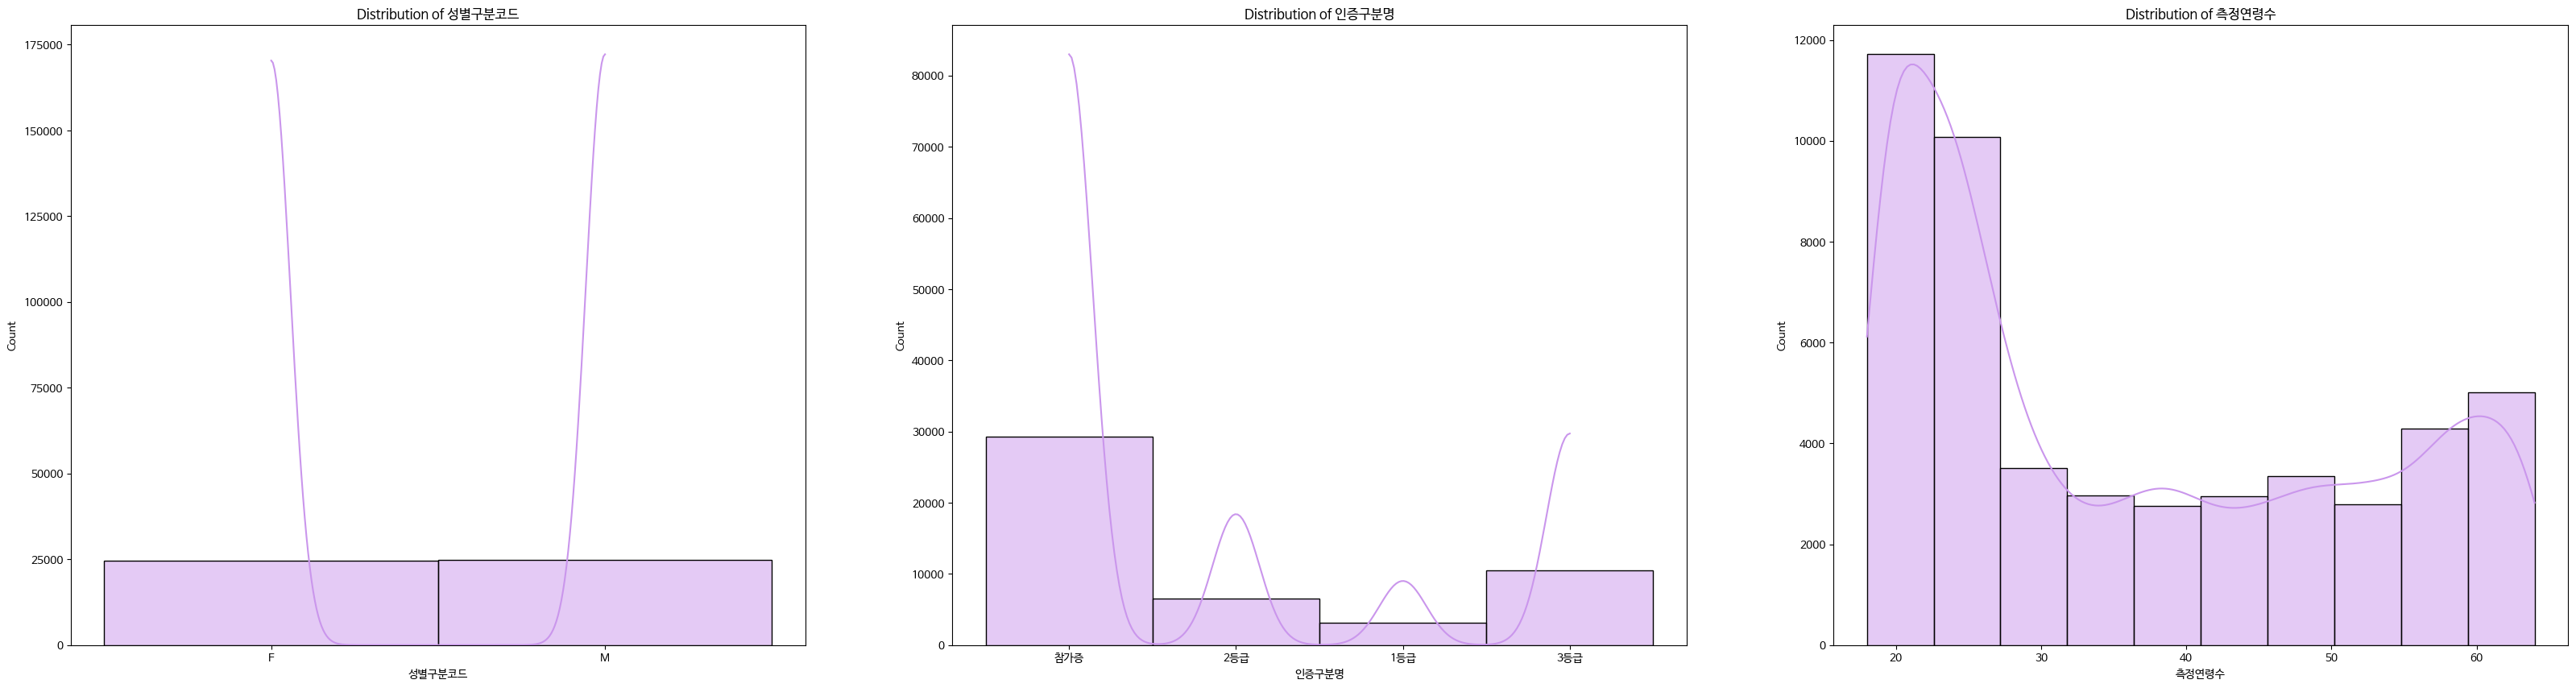

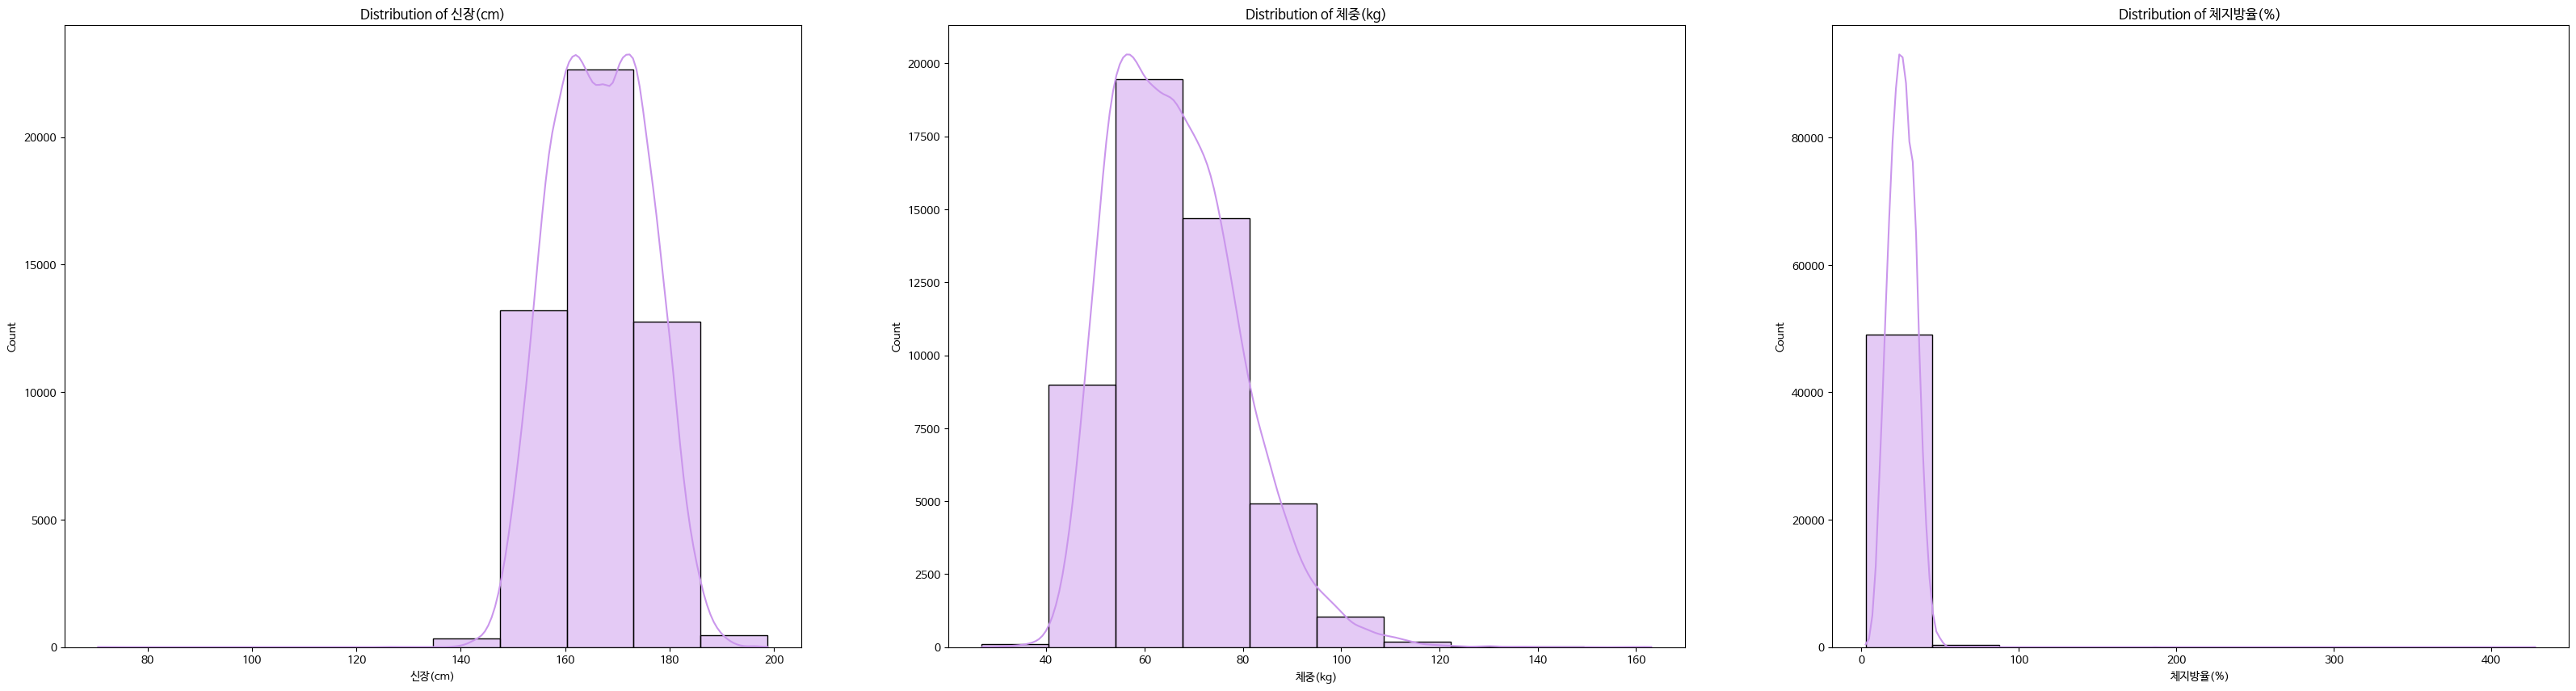

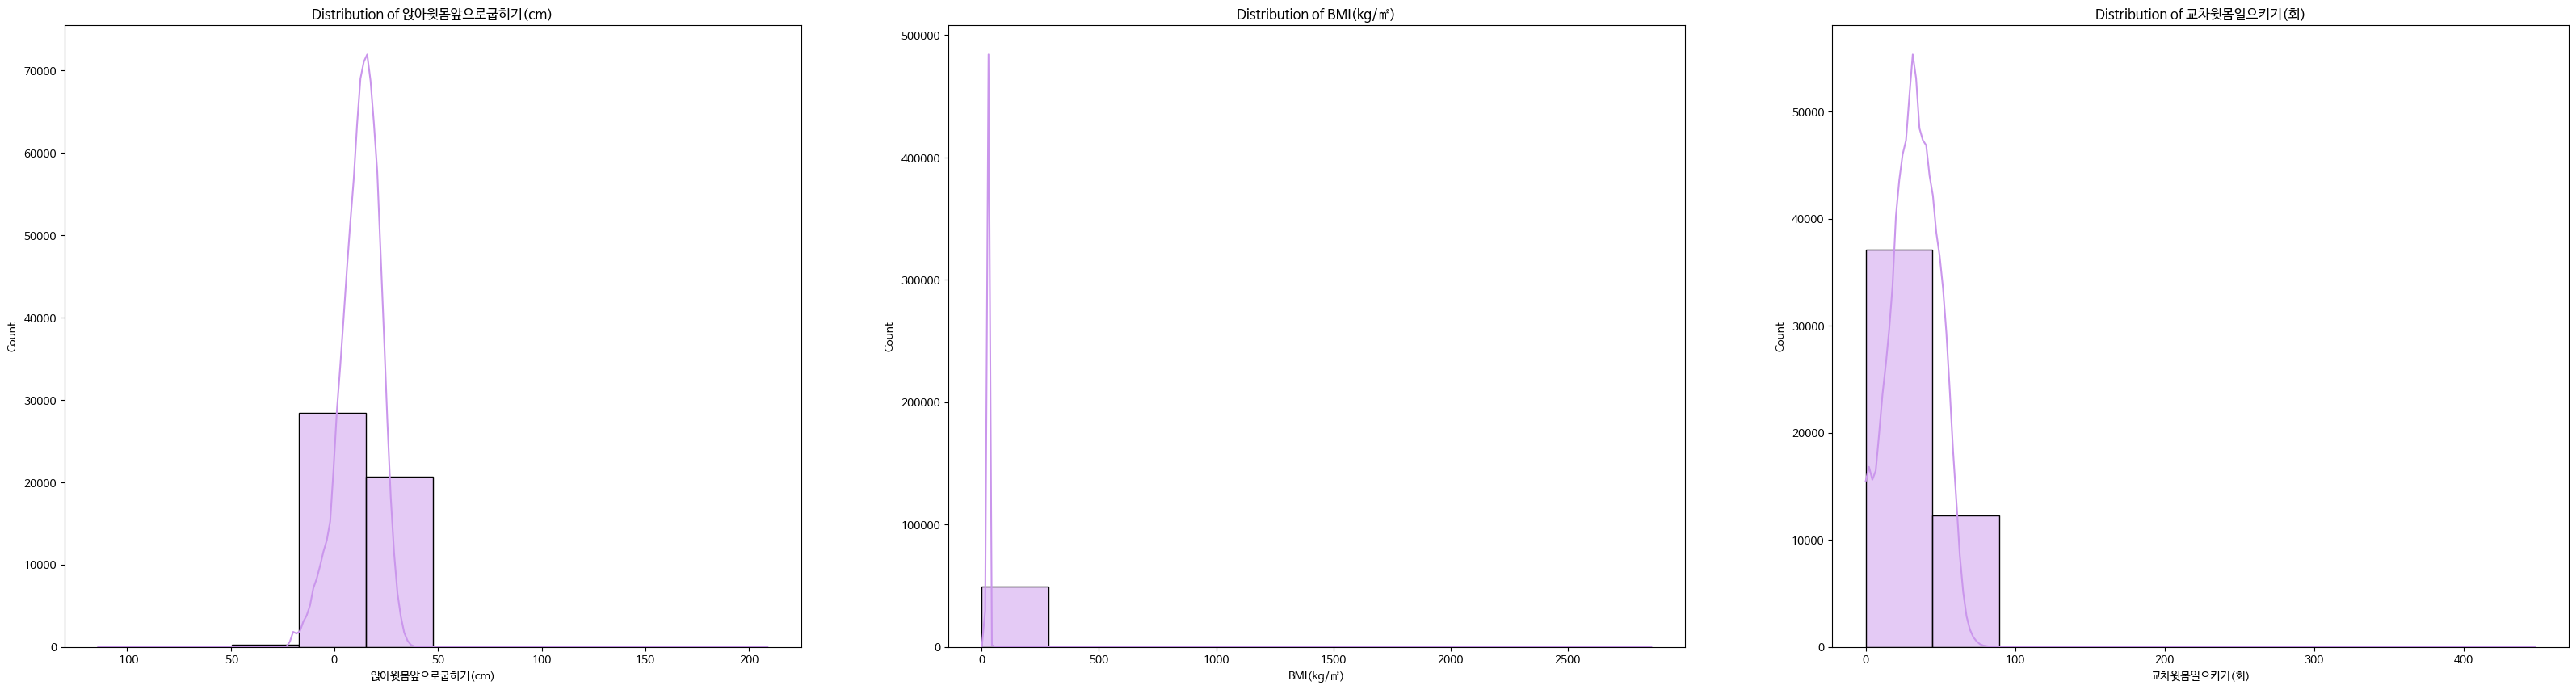

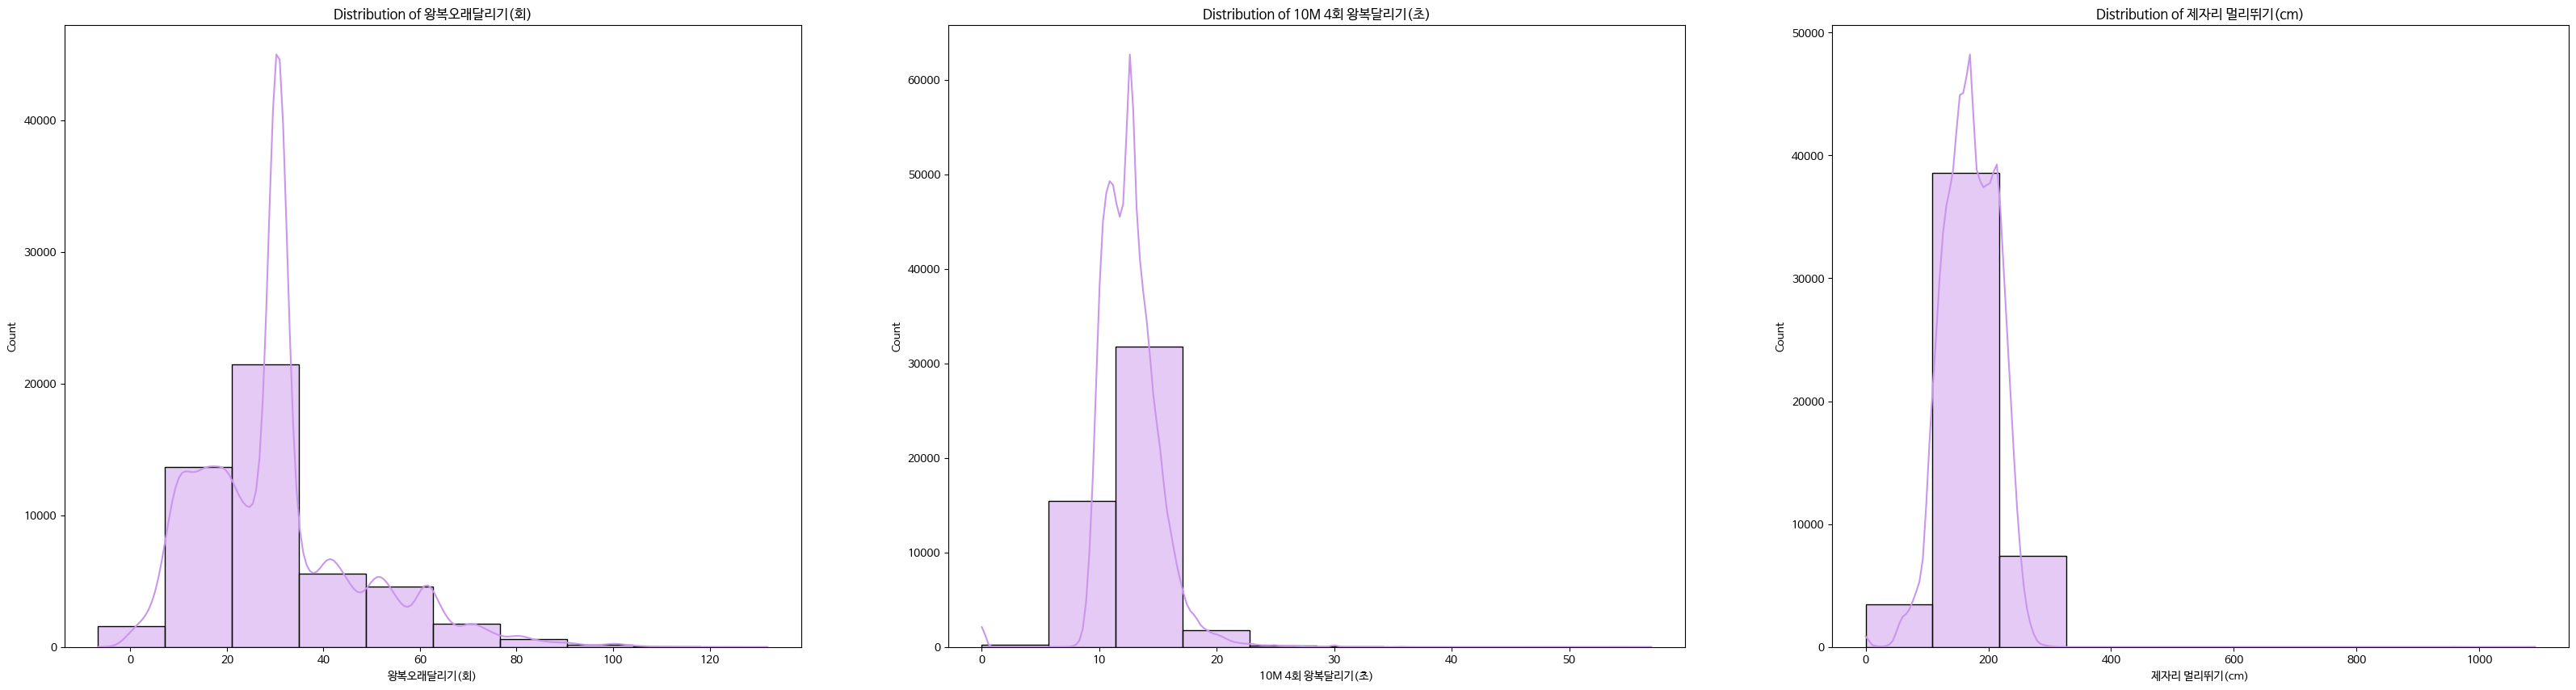

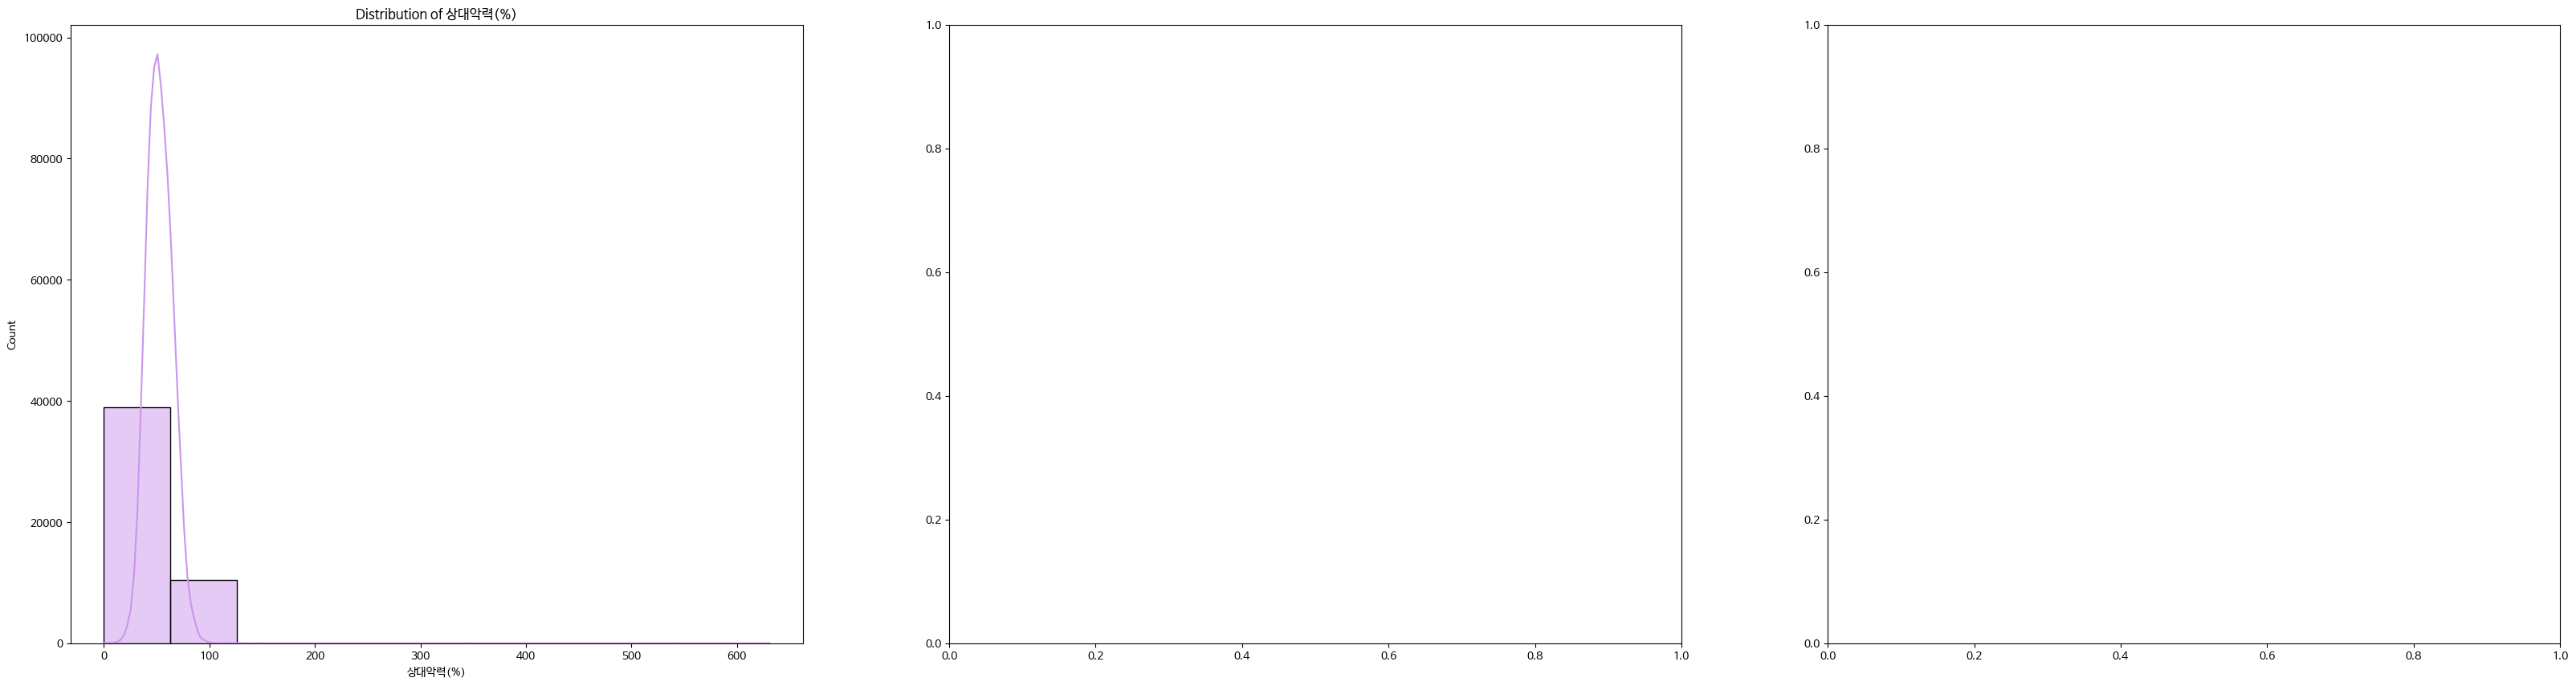

In [20]:
draw_histPlot(data, feature)

## Multicollinearity
**pairplot**과 **heatmap**을 그려 변수 간의 관계 알아봄 <br>
**피어슨 상관계수** 활용 <br>
  * 0.0~0.2 : very weak correlation (or negligible)
  * 0.2~0.4 : weak correlation
  * 0.4~0.6 : moderate correlation
  * 0.6~0.8 : strong correlation
  * 0.8~1.0 : very strong correlation

**극단적인 값**에 상관계수 값이 크게 변경될 수 있어 극단적인 값을 살펴봐야함 <br>
낮은 상관계수를 갖더라도 변수 사이 **비선형 관계** 있기도 하여 **산점도**와 **적합선**을 그려 확인

후보 1 : `신장(cm)` & `제자리 멀리뛰기(cm)` <br>
후보 2 : `신장(cm)` & `체중(kg)` <br>
후보 3 : `제자리 멀리뛰기(cm)` & `교차윗몸일으키기(회)` <br>

피처 간의 상관관계가 우려되며 자세히 살펴봐야함

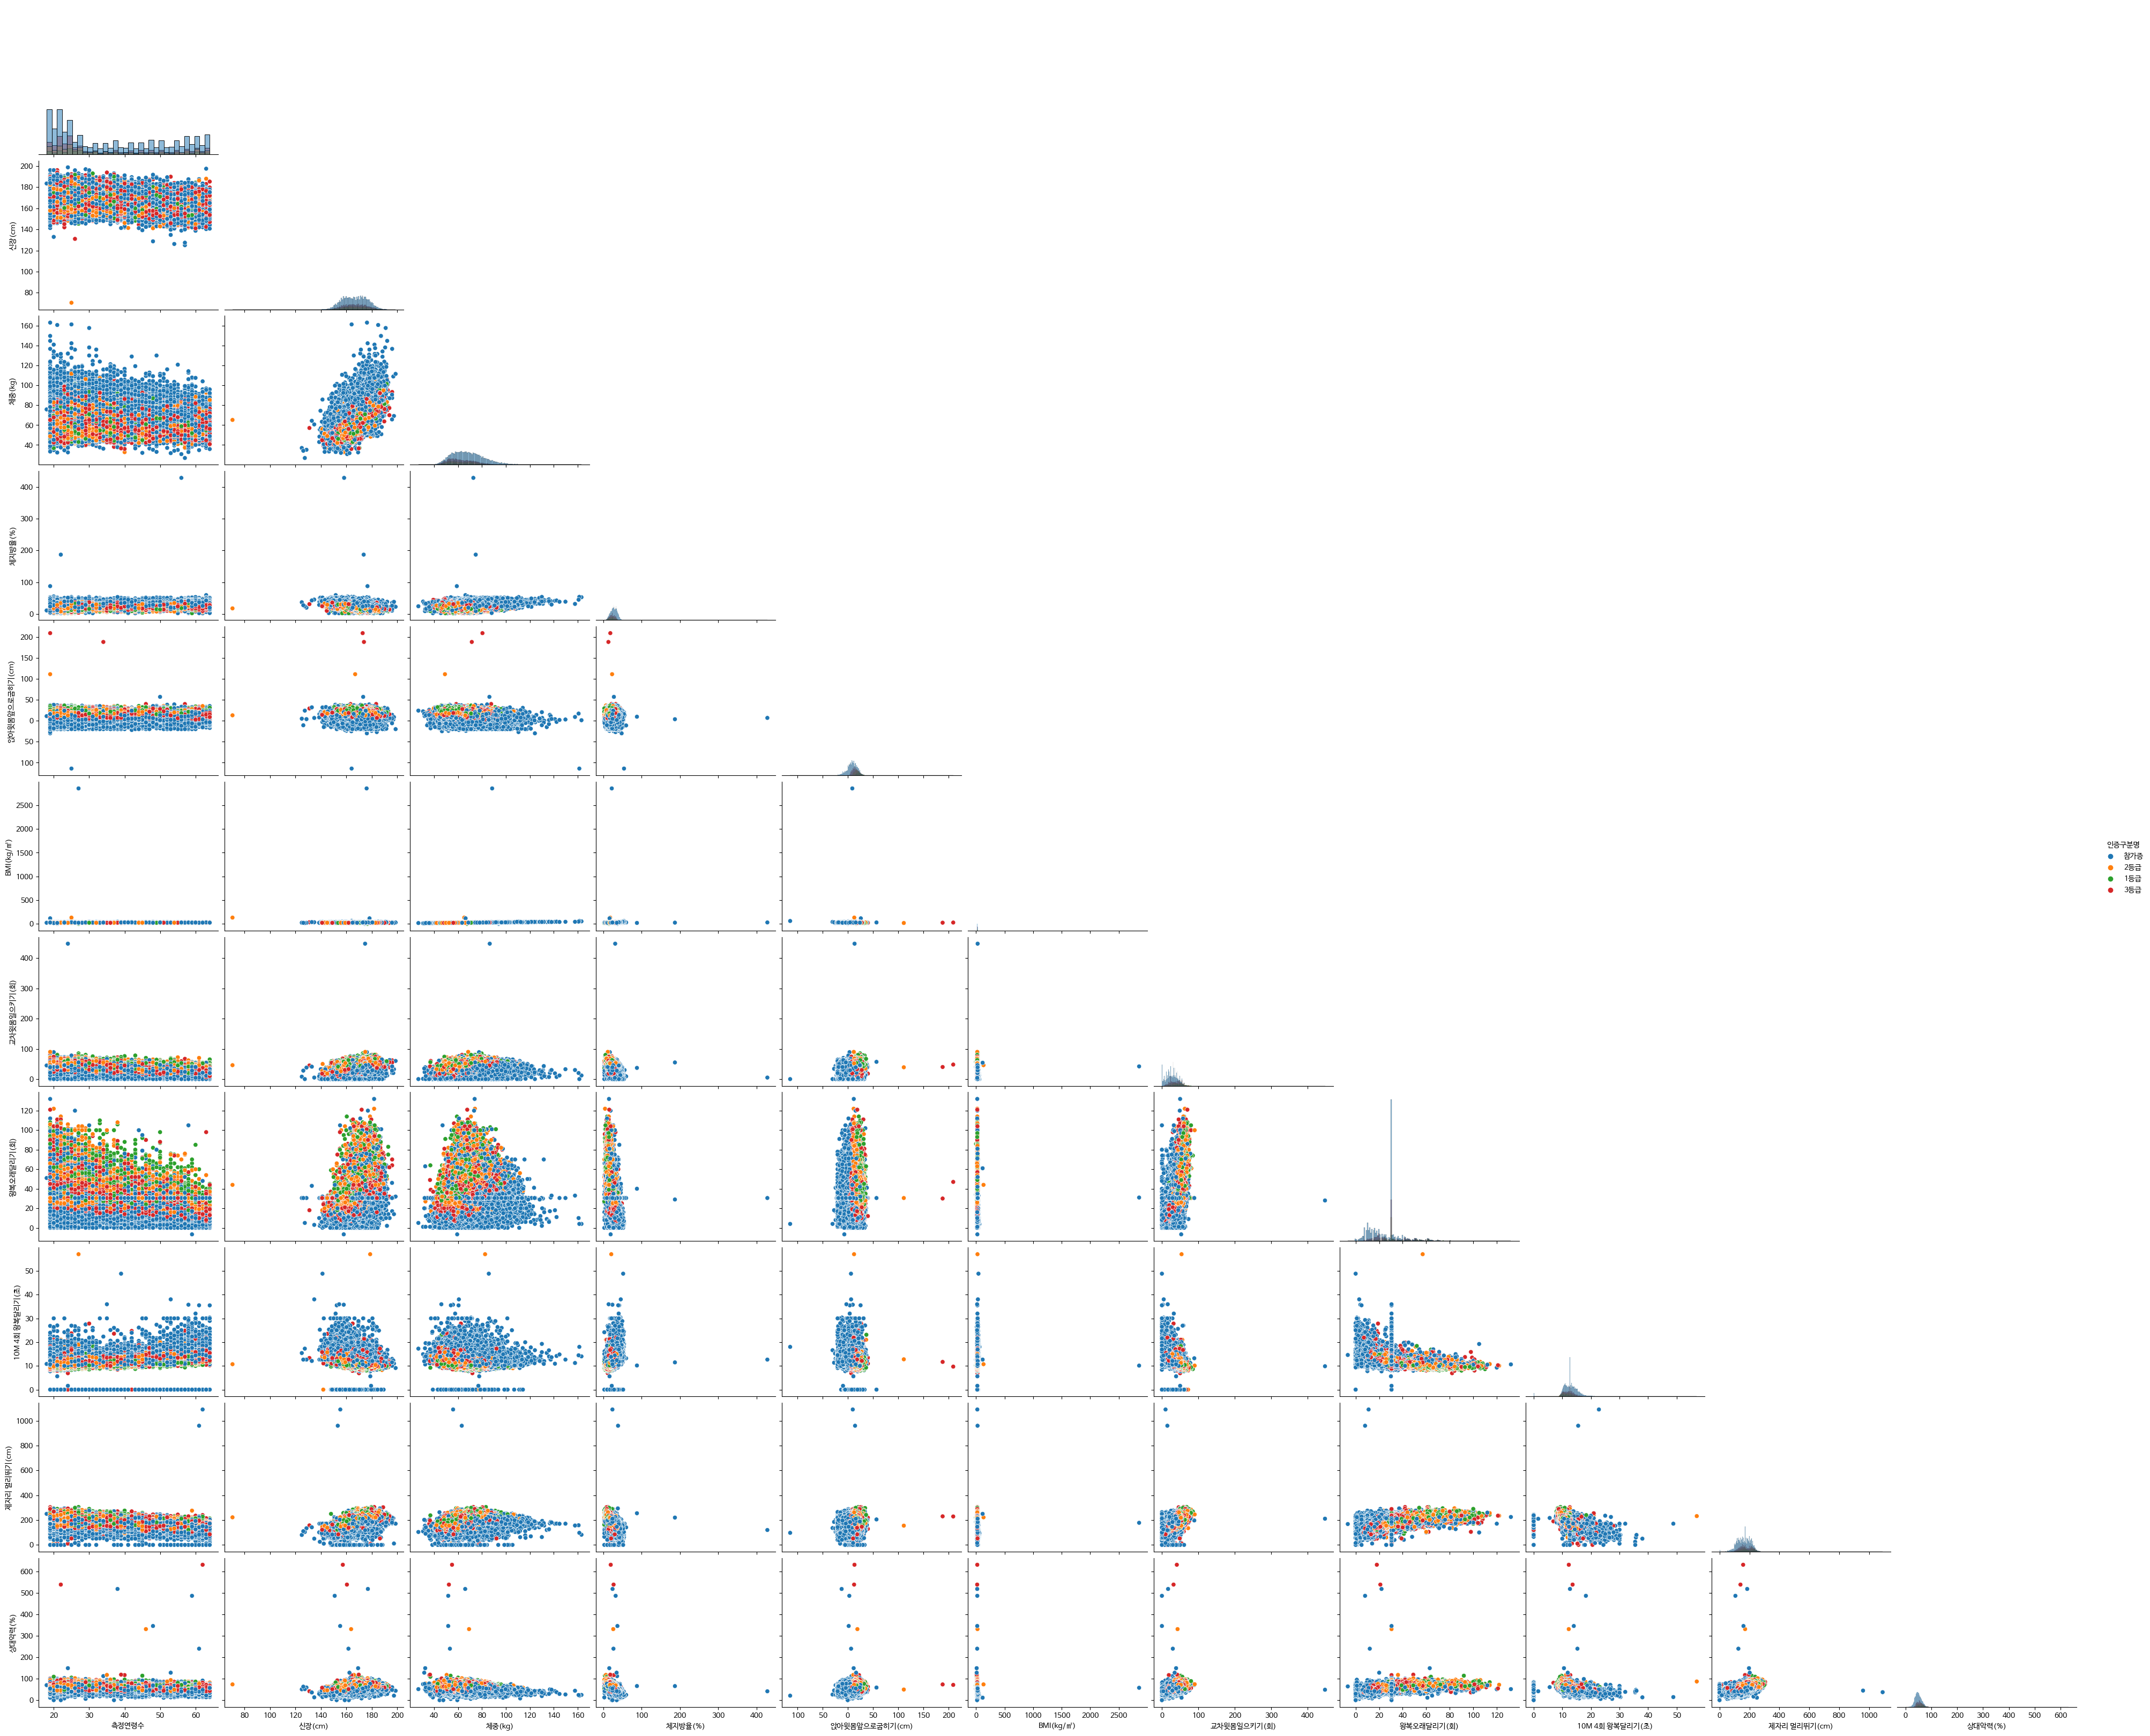

In [21]:
sns.pairplot(data[feature], diag_kind = "hist", hue = target, height = 3, aspect = 1.2, corner = True);

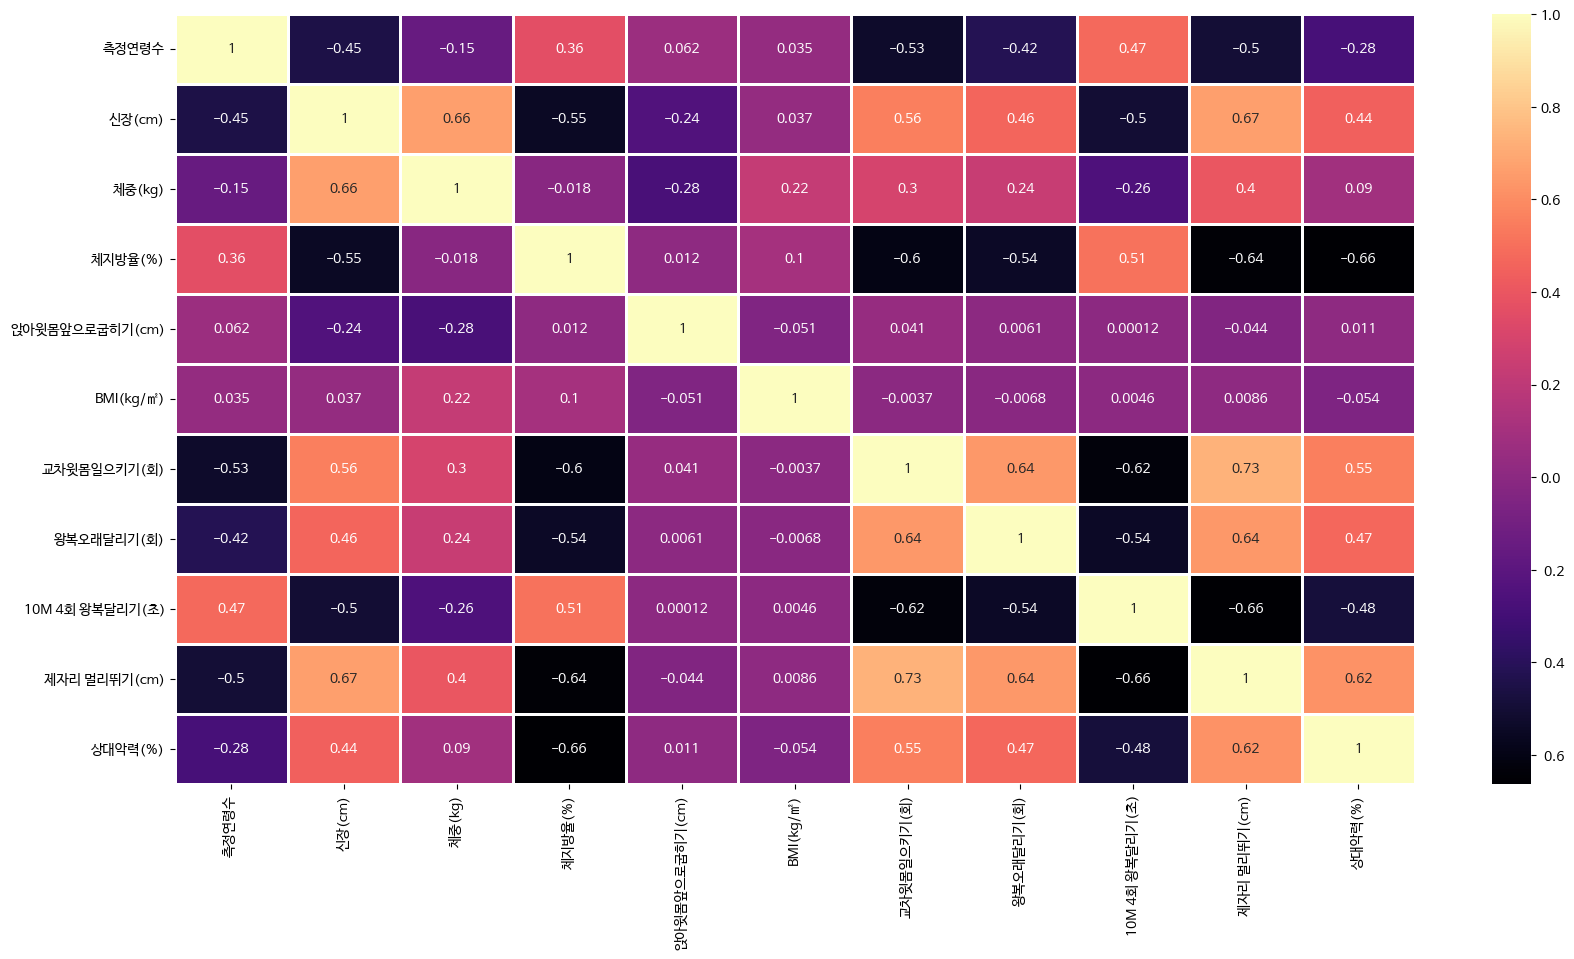

In [22]:
plt.figure(figsize = [20, 10], facecolor = 'white')
sns.heatmap(data[feature].corr(), annot = True, linewidths = 2, cmap = "magma");

후보 1 : `신장(cm)` & `제자리 멀리뛰기(cm)` <br>

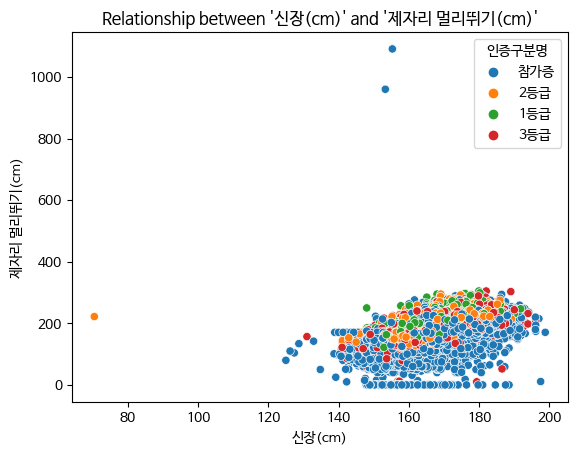

In [23]:
sns.scatterplot(x = "신장(cm)",
                y = "제자리 멀리뛰기(cm)",
                hue = target,
                data = data).set(title = "Relationship between '신장(cm)' and '제자리 멀리뛰기(cm)'");

In [24]:
print("Pearson correlation coefficient:", st.pearsonr(data["신장(cm)"], data["제자리 멀리뛰기(cm)"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.668383147772311, pvalue=0.0)


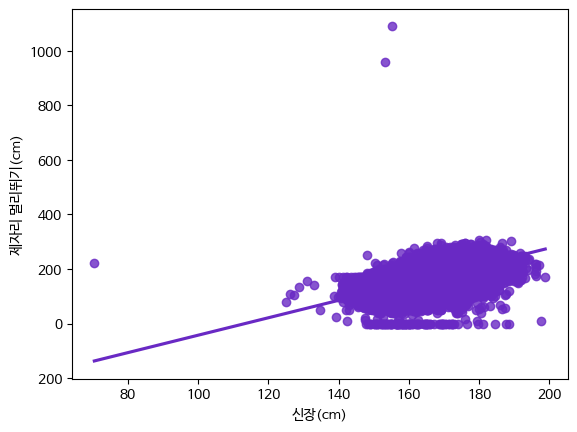

In [25]:
sns.regplot(x = "신장(cm)", y = "제자리 멀리뛰기(cm)", data = data, color = "#6929C4");

후보 2 : `신장(cm)` & `체중(kg)` <br>

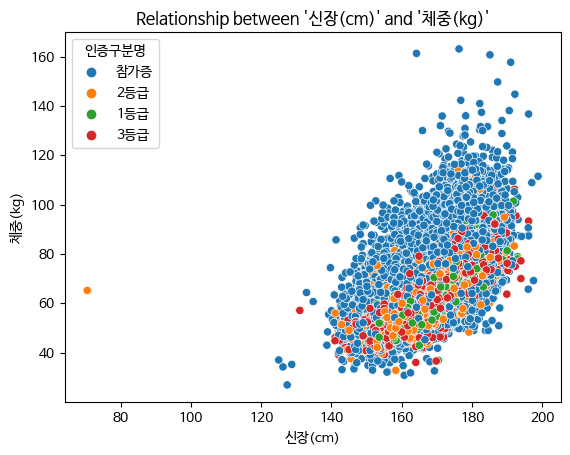

In [26]:
sns.scatterplot(x = "신장(cm)",
                y = "체중(kg)",
                hue = target,
                data = data).set(title = "Relationship between '신장(cm)' and '체중(kg)'");

In [27]:
print("Pearson correlation coefficient:", st.pearsonr(data["신장(cm)"], data["체중(kg)"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.6626292332795028, pvalue=0.0)


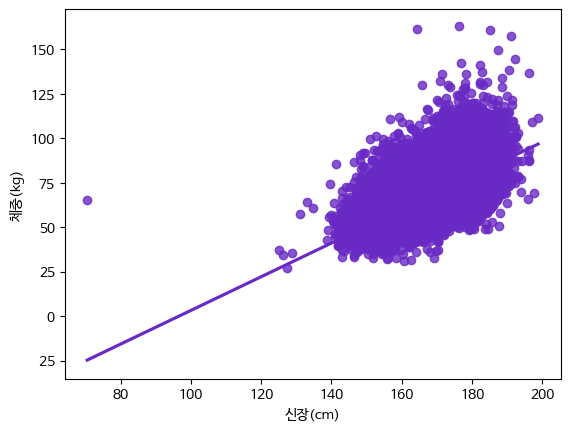

In [28]:
sns.regplot(x = "신장(cm)", y = "체중(kg)", data = data, color = "#6929C4");

후보 3 : `제자리 멀리뛰기(cm)` & `교차윗몸일으키기(회)` <br>

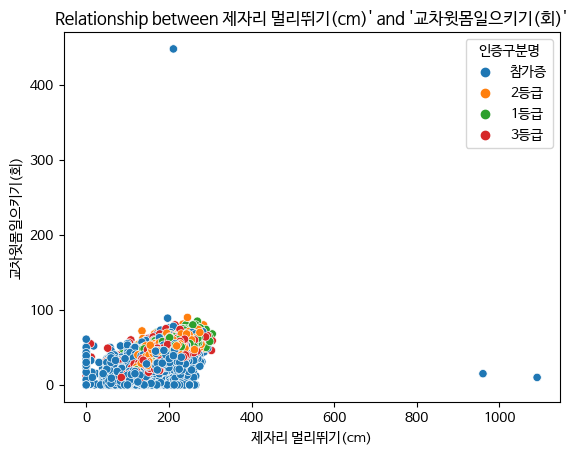

In [29]:
sns.scatterplot(x = "제자리 멀리뛰기(cm)",
                y = "교차윗몸일으키기(회)",
                hue = target,
                data = data).set(title = "Relationship between 제자리 멀리뛰기(cm)' and '교차윗몸일으키기(회)'");

In [30]:
print("Pearson correlation coefficient:", st.pearsonr(data["제자리 멀리뛰기(cm)"], data["교차윗몸일으키기(회)"]))

Pearson correlation coefficient: PearsonRResult(statistic=0.7327550911987953, pvalue=0.0)


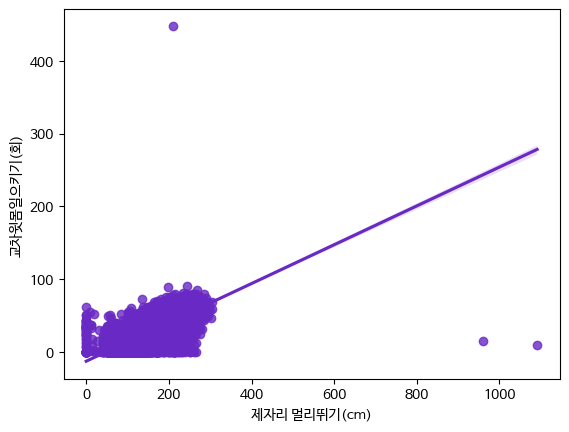

In [31]:
sns.regplot(x = "제자리 멀리뛰기(cm)", y = "교차윗몸일으키기(회)", data = data, color = "#6929C4");

후보 1 : `신장(cm)` & `제자리 멀리뛰기(cm)` <br>
후보 2 : `신장(cm)` & `체중(kg)` <br>
후보 3 : `제자리 멀리뛰기(cm)` & `교차윗몸일으키기(회)` <br>

산점도 상세 분석 결과 후보 3개 모두 상관관계가 있다고 하기 어려움<br>
각 항목에 모두 극단적인 값이 존재해 이에 대한 처리 필요함<br>

# Feature Engineering

## 범주형 변수 처리 

`성별구분코드` : M과 F 간의 위계와 단계적인 처리 없음 - One Hot Encoding <br>
`인증구분명` : 참가증, 3등급, 2등급, 1등급 간의 단계적인 차이 있음 - Labeling

In [32]:
# 성별구분코드
print('{} 범주화 후 : {}'.format("성별구분코드",data["성별구분코드"].unique()))
data = pd.get_dummies(data = data, columns = ['성별구분코드'], prefix = '성별구분코드')
print('{} 범주화 후 : {}'.format("성별구분코드_F",data["성별구분코드_F"].unique()))
print('{} 범주화 후 : {}'.format("성별구분코드_M",data["성별구분코드_M"].unique()))

성별구분코드 범주화 후 : ['F' 'M']
성별구분코드_F 범주화 후 : [1 0]
성별구분코드_M 범주화 후 : [0 1]


In [33]:
# 컬럼 삭제에 따라 칼럼명 관련 변수 업데이트
feature.remove("성별구분코드")

In [34]:
# 인증구분명
print('{} 범주화 전 : {}'.format("인증구분명",data["인증구분명"].unique()))
data['인증구분명'] = data['인증구분명'].map({'참가증': 0, '3등급': 1, "2등급":2, "1등급":3})
print('{} 범주화 후 : {}'.format("인증구분명",data["인증구분명"].unique()))

인증구분명 범주화 전 : ['참가증' '2등급' '1등급' '3등급']
인증구분명 범주화 후 : [0 2 3 1]


In [35]:
data.columns

Index(['회원일련번호값', '측정연령수', '측정일자', '인증구분명', '신장(cm)', '체중(kg)', '체지방율(%)',
       '앉아윗몸앞으로굽히기(cm)', 'BMI(kg/㎡)', '교차윗몸일으키기(회)', '왕복오래달리기(회)',
       '10M 4회 왕복달리기(초)', '제자리 멀리뛰기(cm)', '상대악력(%)', '준비운동', '본운동', '마무리운동',
       '성별구분코드_F', '성별구분코드_M'],
      dtype='object')

## Feature Scaling

### Outlier / 극단적인 값 처리

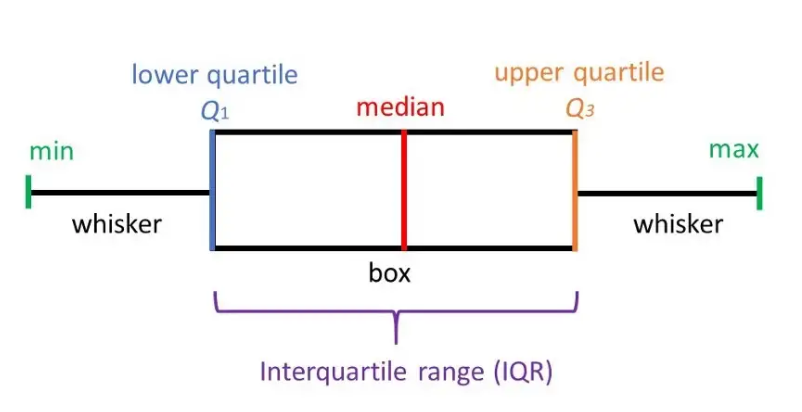

> (Q1 – 1.5 IQR) 보다 작거나 (Q3 + 1.5 IQR) 보다 큰 데이터는 이상치로 처리


* 제 1사분위(Q1) : 25%의 위치를 의미한다.

* 제 2사분위(Q2) : 50%의 위치로 중앙값(median)을 의미한다.

* 제 3사분위(Q3) : 75%의 위치를 의미한다.

* 최댓값 : 제 3사분위에서 1.5 IQR을 더한 위치이다.

* 최솟값 : 제 1사분위(Q1)에서 1.5 IQR을 뺀 위치이다.

* IQR : (제 3사분위 값) - (제 1사분위 값)

In [36]:
# 연속형 변수의 boxplot 그리기
def show_boxplot(data,columns):
  plt.figure(figsize=(20,15))
  sns.boxplot(data=data[columns])
  plt.show()

In [37]:
# 연속형 변수 각각에 대해 IQR 범위 확인

def check_IQR(data, columns):
  for col in columns:

      print(f'{col} :')

      # Q1 & Q3
      Q3 = np.percentile(data[col], 75)
      Q1 = np.percentile(data[col], 25)
      
      # IQR & min/max
      IQR = Q3 - Q1
      min = Q1 - 1.5 * IQR
      max = Q3 + 1.5 * IQR
      print(f'data 최대값 : {data[col].min()}, 최소값 {data[col].max()}') # data min, max
      print(f'Q1 – 1.5 IQR 값 : {min},   Q3 + 1.5 IQR 값 : {max})') # range
      print()


In [38]:
# 주어진 피쳐값에 대한 이상치 처리
def replace_outlier_value(df,col):
    iqr=np.percentile(df[col], 75)-np.percentile(df[col], 25)
    per75=np.percentile(df[col], 75)
    per25=np.percentile(df[col], 25)
    df[col]=np.where(df[col]>per75+1.5*iqr, per75+1.5*iqr,df[col] ) # 최대값으로 대체
    df[col]=np.where(df[col]<per25-1.5*iqr, per25-1.5*iqr,df[col] ) # 최소값으로 대체
    return df[col]

# 주어진 여러 피처값에 대해 iter 돌며 이상치 처리
def replace_outlier_cols(df, columns):
  for col in columns:
    df[col]=replace_outlier_value(df,col)
  return df



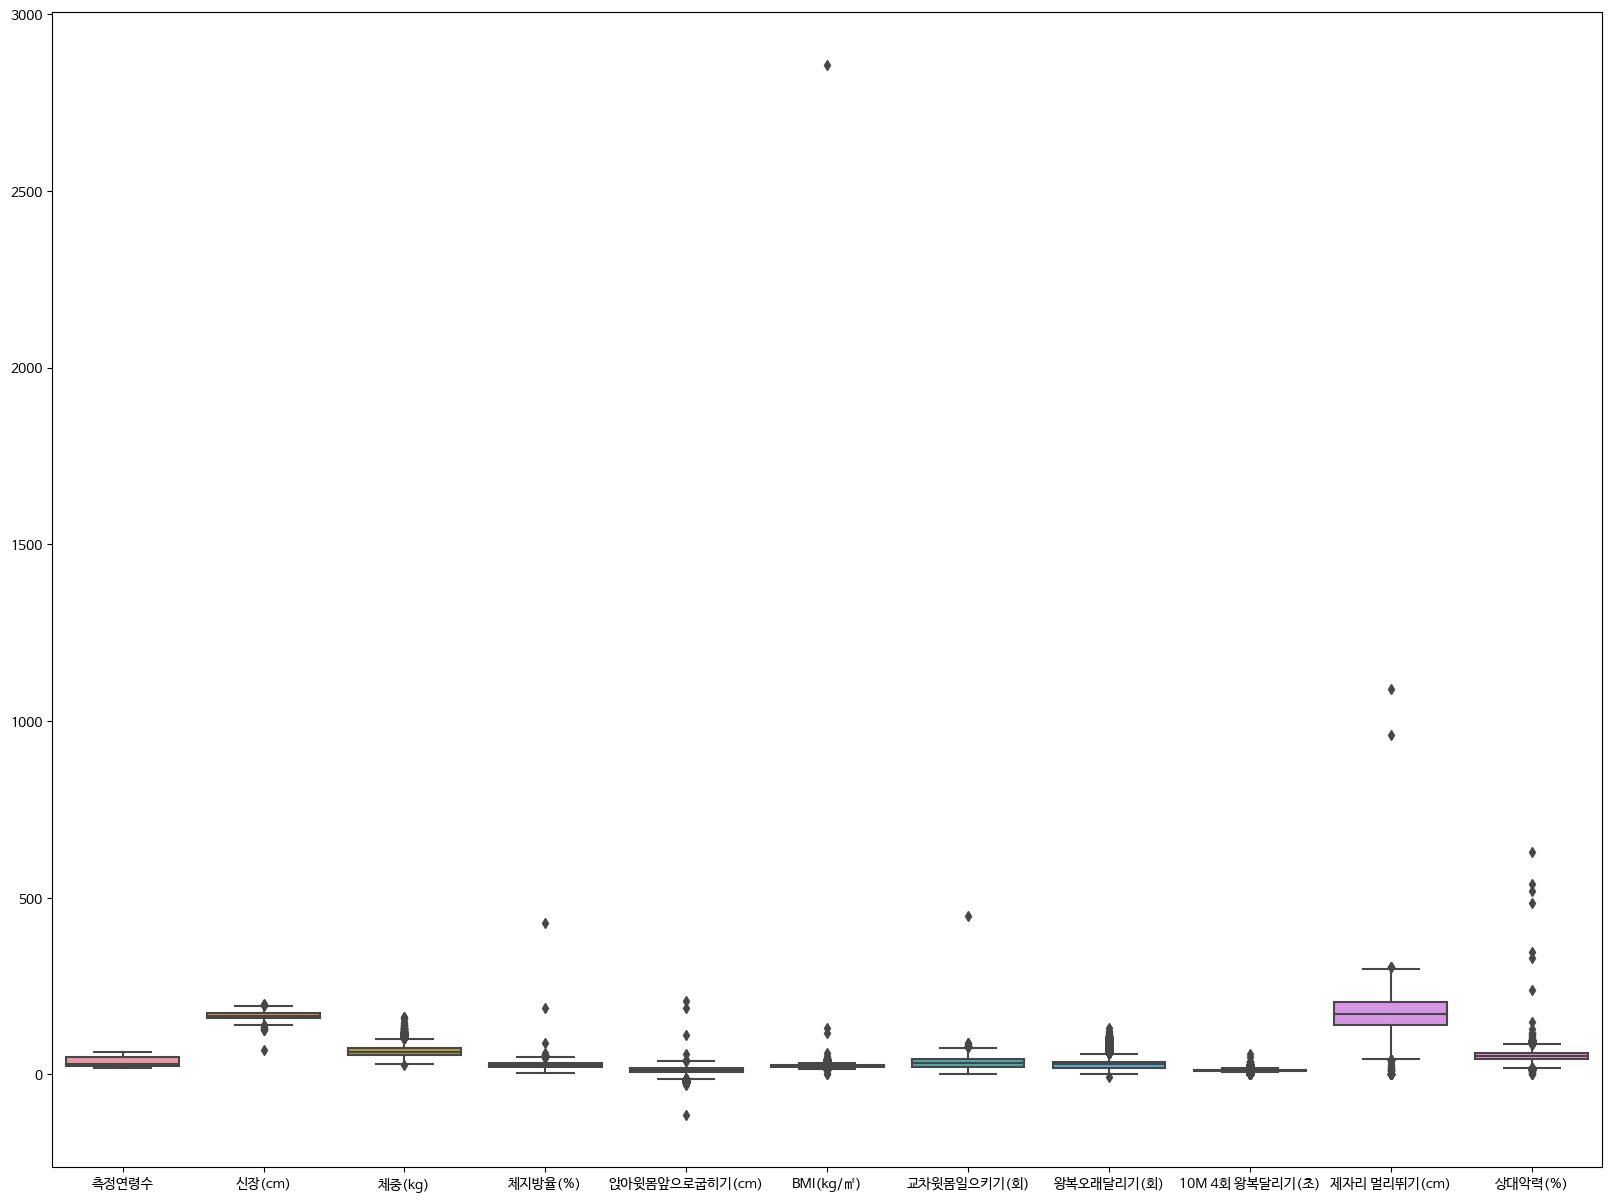

In [39]:
# 이상치 처리 전 항목별 데이터 분포
show_boxplot(data, numeric_col)

In [40]:
check_IQR(data, numeric_col)

측정연령수 :
data 최대값 : 18, 최소값 64
Q1 – 1.5 IQR 값 : -17.5,   Q3 + 1.5 IQR 값 : 90.5)

신장(cm) :
data 최대값 : 70.5, 최소값 198.8
Q1 – 1.5 IQR 값 : 138.95000000000005,   Q3 + 1.5 IQR 값 : 194.54999999999995)

체중(kg) :
data 최대값 : 26.9, 최소값 163.1
Q1 – 1.5 IQR 값 : 28.999999999999993,   Q3 + 1.5 IQR 값 : 101.80000000000001)

체지방율(%) :
data 최대값 : 2.8, 최소값 428.0
Q1 – 1.5 IQR 값 : 2.0,   Q3 + 1.5 IQR 값 : 50.0)

앉아윗몸앞으로굽히기(cm) :
data 최대값 : -114.0, 최소값 209.0
Q1 – 1.5 IQR 값 : -11.750000000000004,   Q3 + 1.5 IQR 값 : 37.45)

BMI(kg/㎡) :
data 최대값 : 0.2, 최소값 2857.0
Q1 – 1.5 IQR 값 : 14.700000000000003,   Q3 + 1.5 IQR 값 : 32.3)

교차윗몸일으키기(회) :
data 최대값 : 0.0, 최소값 448.0
Q1 – 1.5 IQR 값 : -11.0,   Q3 + 1.5 IQR 값 : 77.0)

왕복오래달리기(회) :
data 최대값 : -6.7, 최소값 132.0
Q1 – 1.5 IQR 값 : -5.0,   Q3 + 1.5 IQR 값 : 59.0)

10M 4회 왕복달리기(초) :
data 최대값 : 0.0, 최소값 57.0
Q1 – 1.5 IQR 값 : 6.664999999999999,   Q3 + 1.5 IQR 값 : 18.225)

제자리 멀리뛰기(cm) :
data 최대값 : 0.0, 최소값 1091.0
Q1 – 1.5 IQR 값 : 42.5,   Q3 + 1.5 IQR 값 : 302.5)

상대악력(%) :
data 최대값 

In [41]:
data = replace_outlier_cols(data, numeric_col)

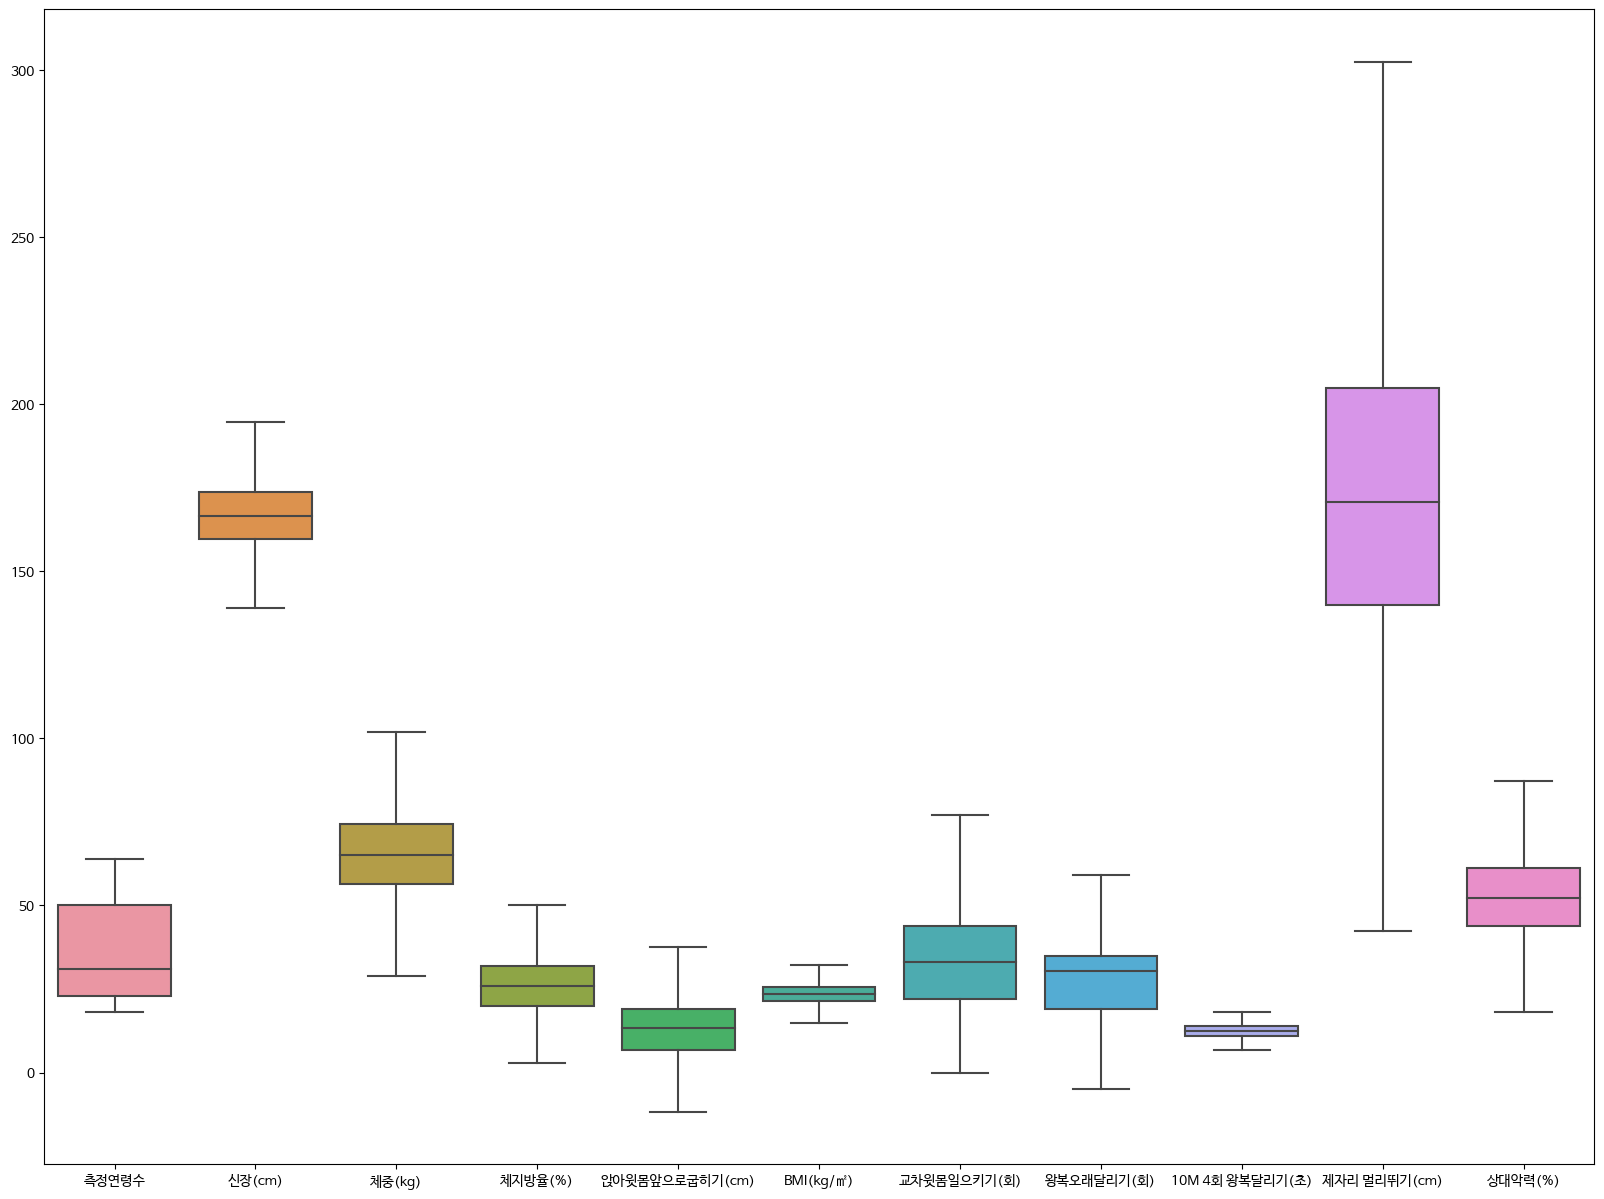

In [42]:
# 이상치 처리 후 항목별 데이터 분포
show_boxplot(data, numeric_col)

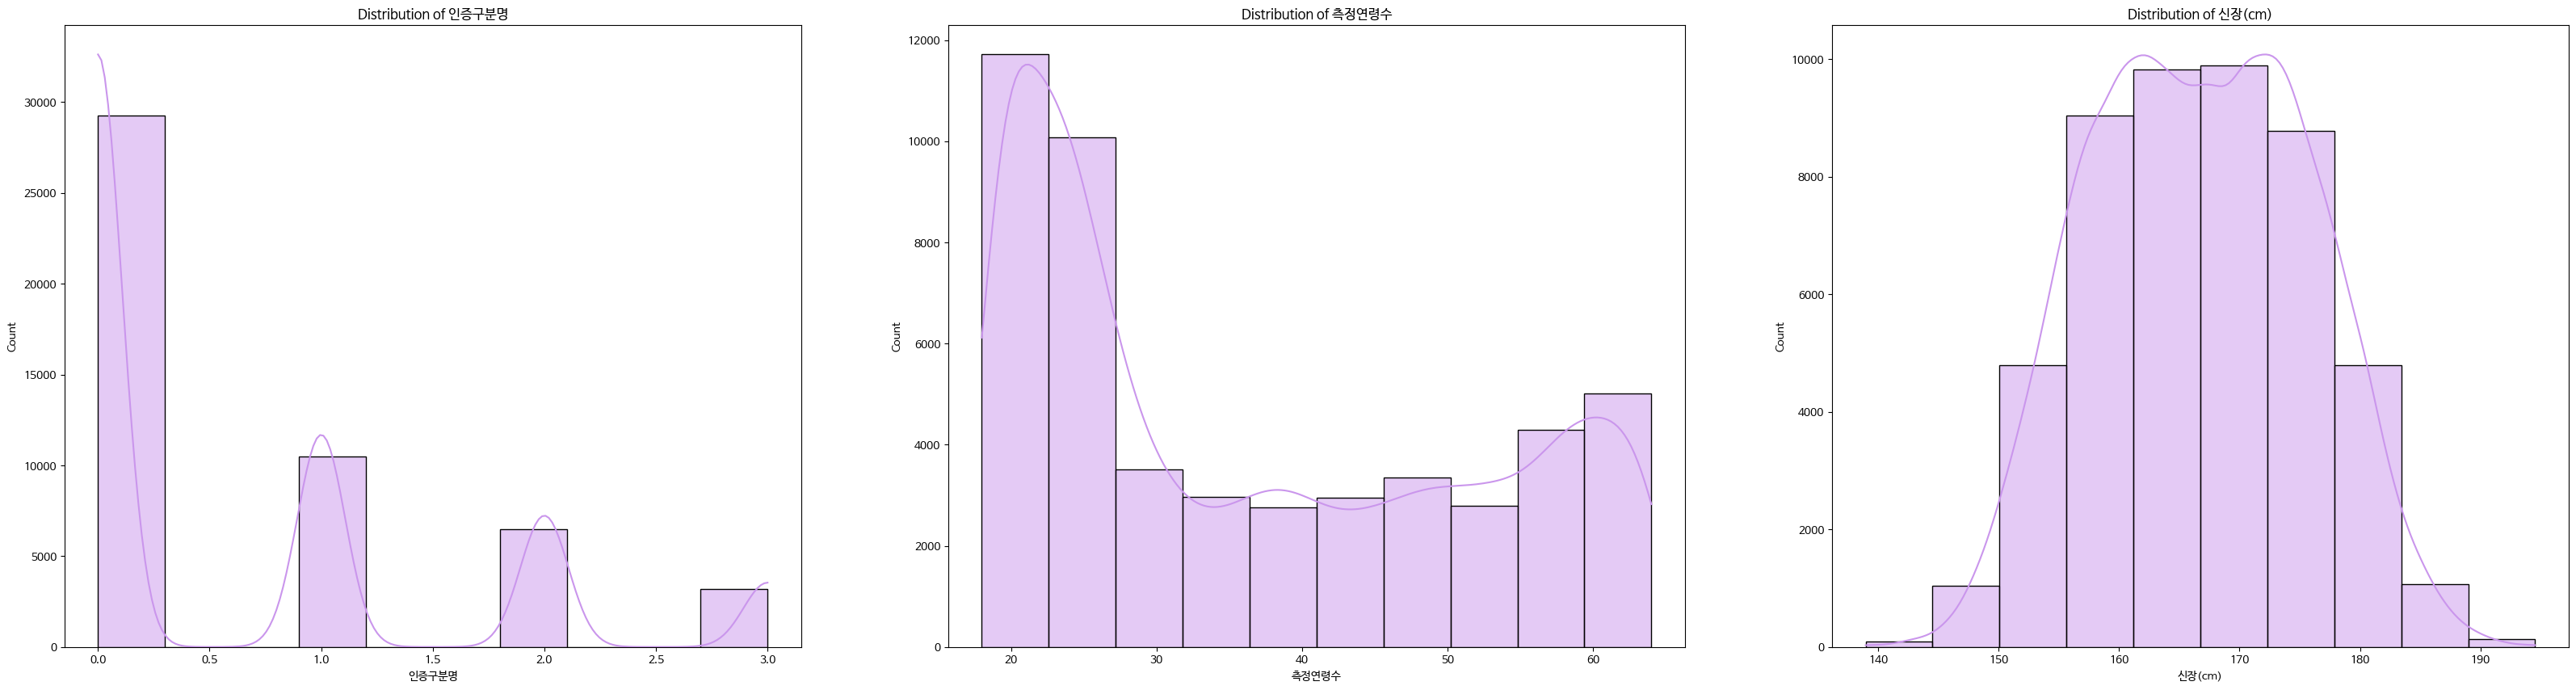

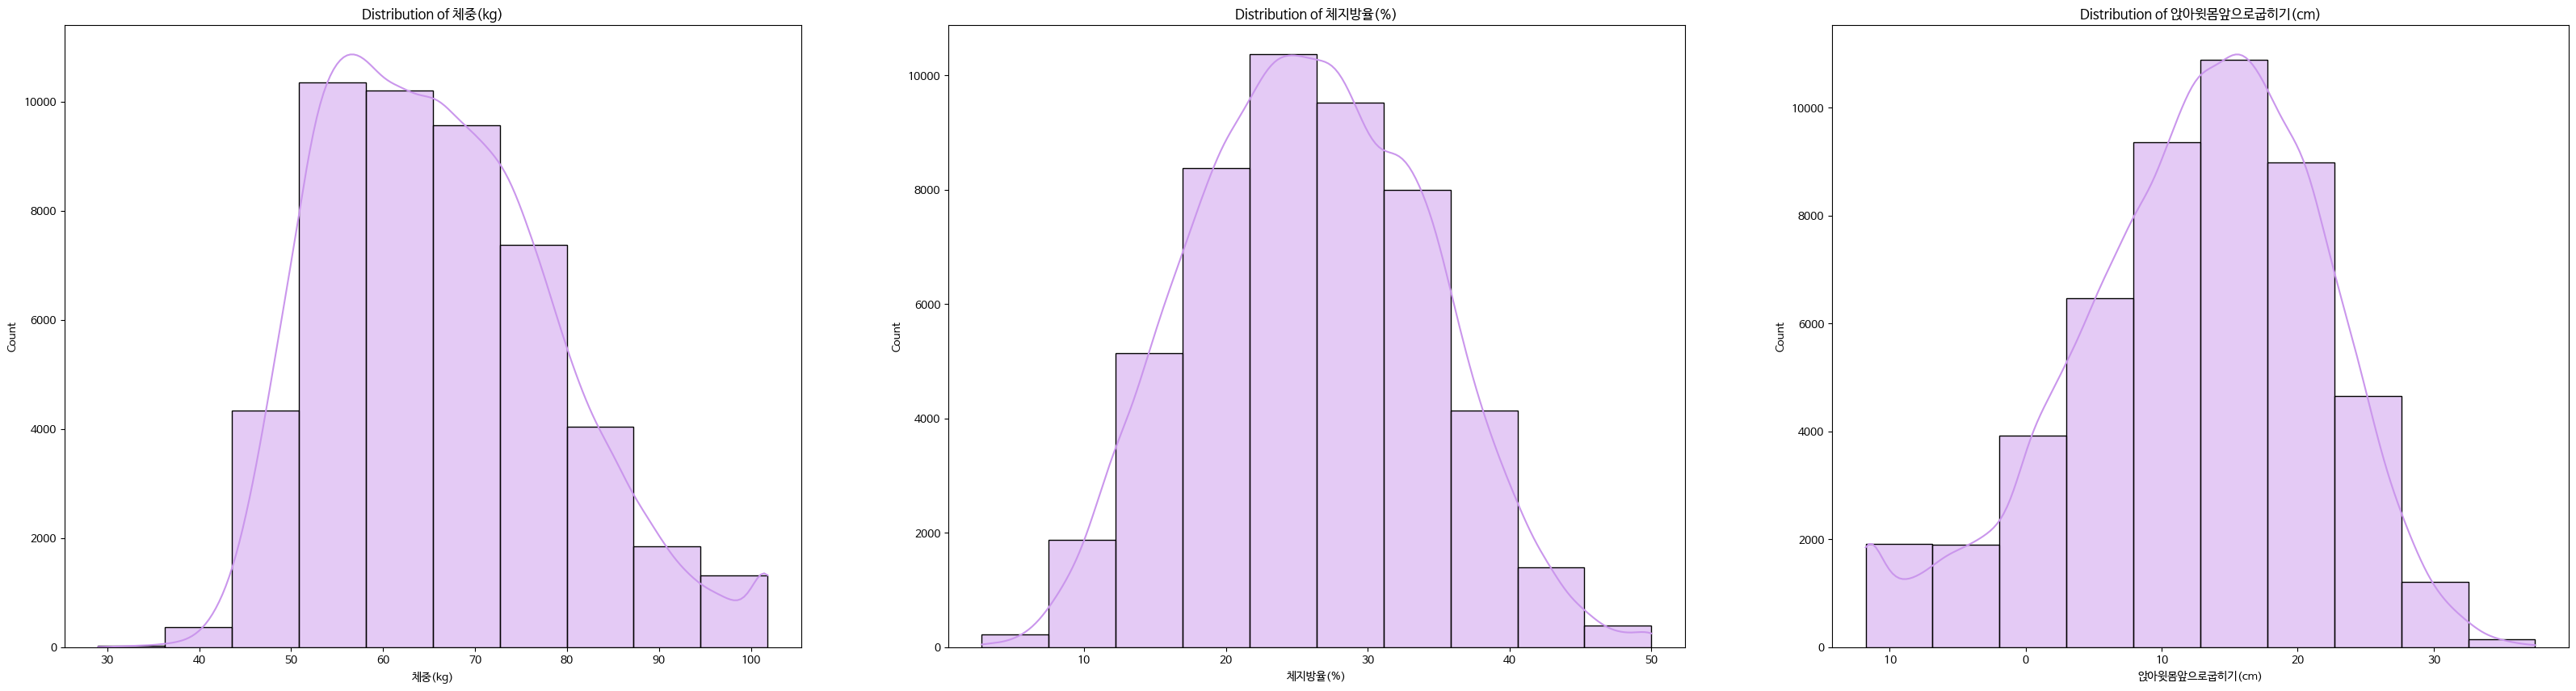

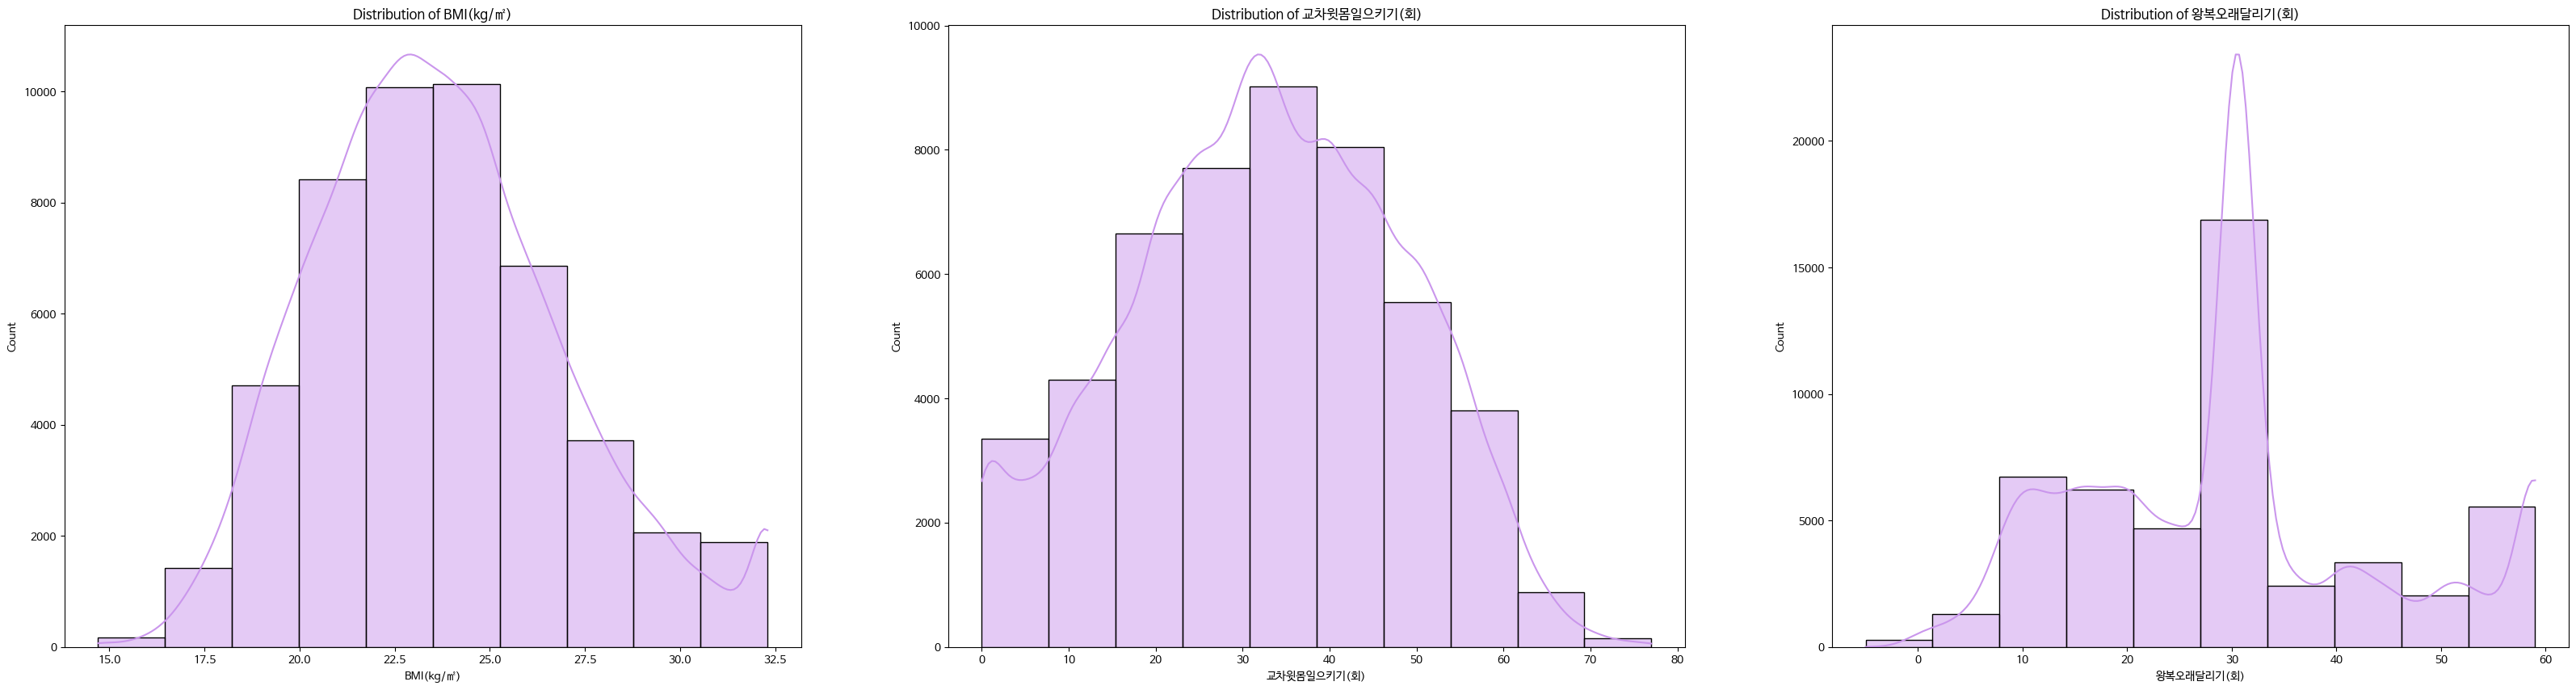

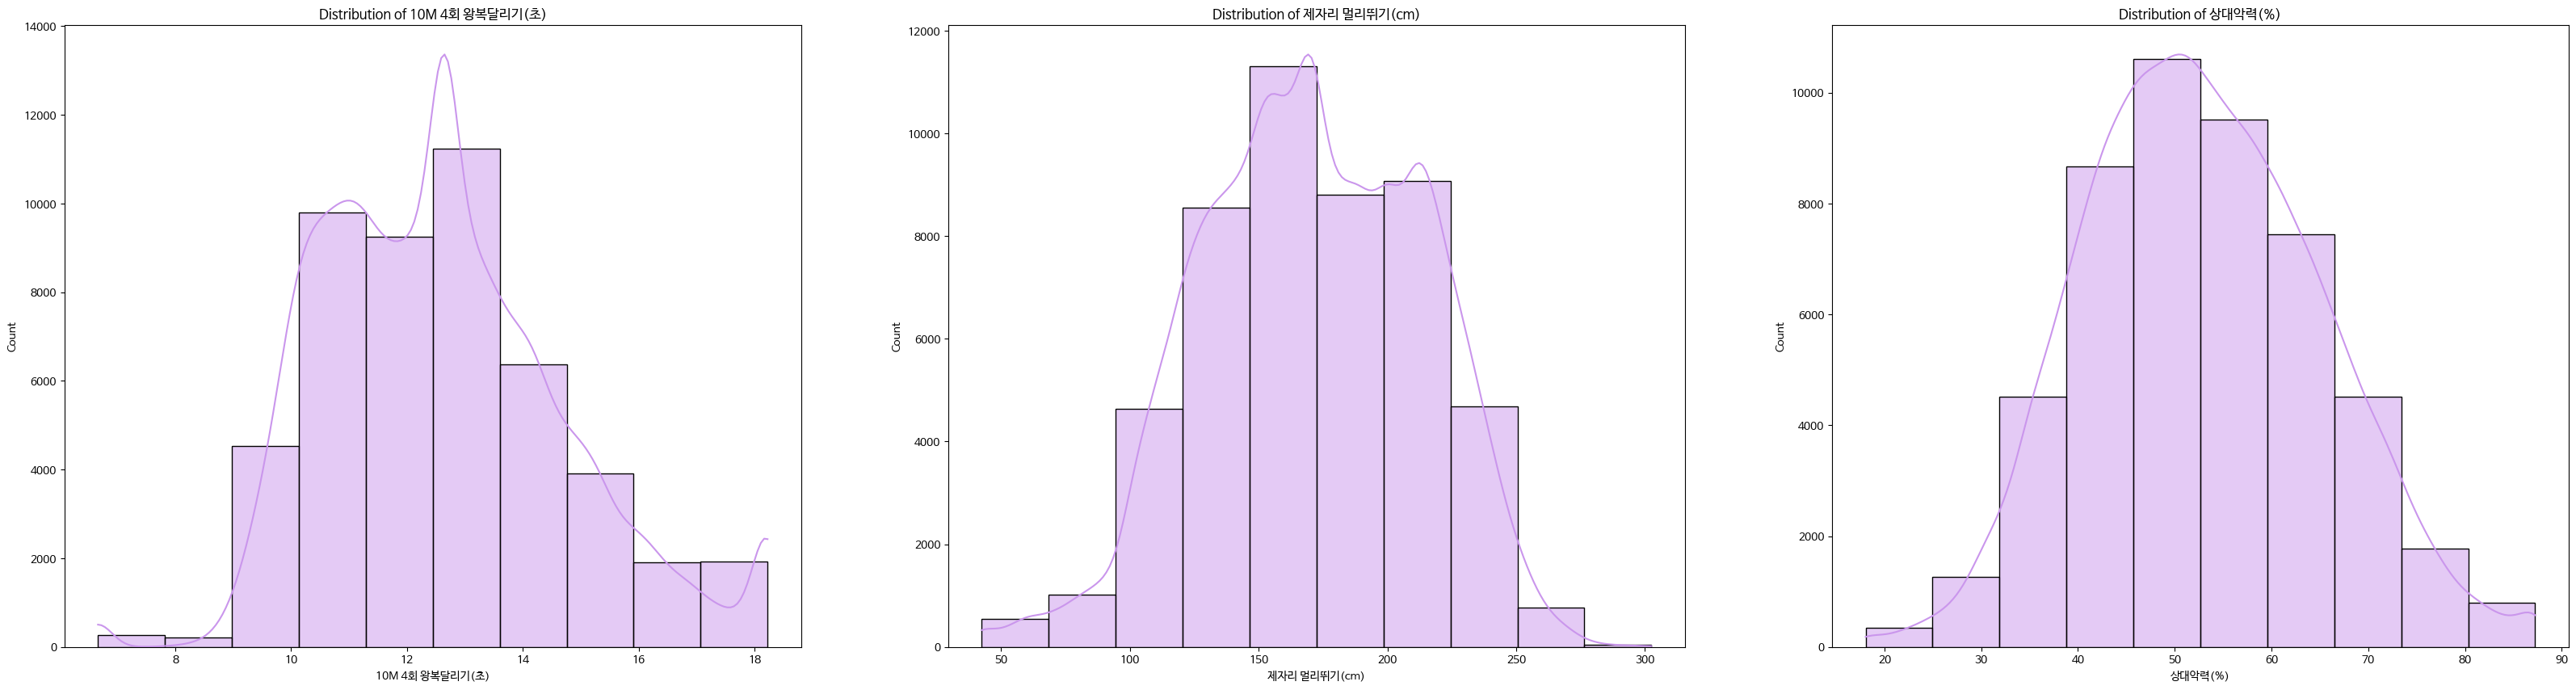

In [43]:
draw_histPlot(data, feature)

In [44]:
get_skewness(data, numeric_col)

측정연령수: 0.4879975656957461
신장(cm): 0.01961546518932565
체중(kg): 0.5175391926998475
체지방율(%): 0.0849977010987536
앉아윗몸앞으로굽히기(cm): -0.47240538432490564
BMI(kg/㎡): 0.4158994939789743
교차윗몸일으키기(회): -0.08033917863571202
왕복오래달리기(회): 0.4464678379164052
10M 4회 왕복달리기(초): 0.5204482540943574
제자리 멀리뛰기(cm): -0.14461281438121207
상대악력(%): 0.1826220392197587


# Select columns

In [45]:
numeric = ["측정연령수",'신장(cm)', '체중(kg)', '체지방율(%)',
       '앉아윗몸앞으로굽히기(cm)', 'BMI(kg/㎡)', '교차윗몸일으키기(회)', '왕복오래달리기(회)',
       '10M 4회 왕복달리기(초)', '제자리 멀리뛰기(cm)', '상대악력(%)']

category = ['성별구분코드_F', '성별구분코드_M']
target = "인증구분명"

# Split Data

In [46]:
df = data.copy()

y = df[target]
X = df[numeric + category]

In [47]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=100) # 0.25 x 0.8 = 0.2

In [48]:
print('train 크기: {}'.format(X_train.shape))
print('validation 크기: {}'.format(X_val.shape))

train 크기: (29659, 13)
validation 크기: (9887, 13)


# CLASSIFICATION MODELS

In [49]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [50]:
def show_cm(y_true, y_pred):
  report = classification_report(y_true, y_pred)
  print(report)
  cm = confusion_matrix(y_true, y_pred)
  plot_confusion_matrix(cm)

## K-Nearest Neighbors (KNN) Model

In [51]:
# 기본 베이스 라인 GBM
knn_base = KNeighborsClassifier()
knn_base_model = knn_base.fit(X_train, y_train)
y_pred = knn_base_model.predict(X_val)
y_proba = knn_base_model.predict_proba(X_val)

In [52]:
# 기본 베이스 라인 knn 결과
print("Default KNN Logloss Score : {}".format(log_loss(y_val, y_proba)))
print("Default KNN Accuracy Score : {}".format(accuracy_score(y_val, y_pred)))
print("Default KNN F1 Score : {} : {}".format(f1_score(y_val, y_pred, average = None),f1_score(y_val, y_pred, average = "macro")))
#print(classification_report(y_val, y_pred))

Default KNN Logloss Score : 1.844775068873723
Default KNN Accuracy Score : 0.7615050065742894
Default KNN F1 Score : [0.88349432 0.58999321 0.54084507 0.65814152] : 0.6681185279280858


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      5883
           1       0.57      0.61      0.59      2126
           2       0.55      0.53      0.54      1267
           3       0.69      0.63      0.66       611

    accuracy                           0.76      9887
   macro avg       0.67      0.66      0.67      9887
weighted avg       0.76      0.76      0.76      9887



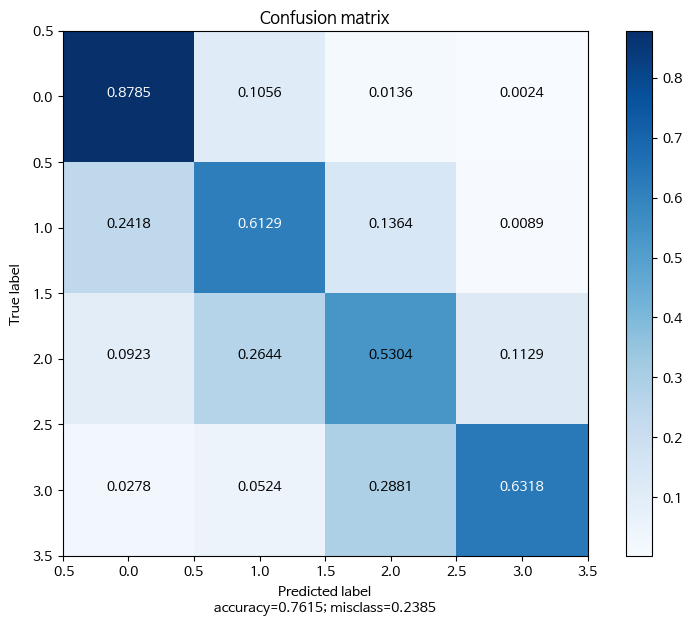

In [53]:
show_cm(y_val, y_pred)

In [54]:
def objective(trial: Trial) -> float:
  params_gbm = {
      "n_neighbors": trial.suggest_int("n_neighbors", 2, 40),
      "leaf_size": trial.suggest_int("leaf_size", 25, 30),
      "weights": trial.suggest_categorical('weights', ['uniform', 'distance']),
  }

  knn_test = KNeighborsClassifier(**params_gbm)
  knn_test_model = knn_test.fit(
        X_train,
        y_train,
  )
  knn_test_pred = knn_test_model.predict_proba(X_val)
  log_score = log_loss(y_val, knn_test_pred)
  return log_score


In [55]:
sampler = TPESampler(seed=42)
study = create_study(
    study_name="knn_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)

[I 2023-04-21 21:48:45,761] A new study created in memory with name: knn_parameter_opt
[I 2023-04-21 21:48:47,358] Trial 0 finished with value: 0.6446279422750001 and parameters: {'n_neighbors': 16, 'leaf_size': 30, 'weights': 'uniform'}. Best is trial 0 with value: 0.6446279422750001.
[I 2023-04-21 21:48:48,749] Trial 1 finished with value: 1.1051510217209797 and parameters: {'n_neighbors': 8, 'leaf_size': 25, 'weights': 'distance'}. Best is trial 0 with value: 0.6446279422750001.
[I 2023-04-21 21:48:51,406] Trial 2 finished with value: 0.5902919586826486 and parameters: {'n_neighbors': 25, 'leaf_size': 29, 'weights': 'distance'}. Best is trial 2 with value: 0.5902919586826486.
[I 2023-04-21 21:48:54,329] Trial 3 finished with value: 0.5897105177987253 and parameters: {'n_neighbors': 34, 'leaf_size': 26, 'weights': 'distance'}. Best is trial 3 with value: 0.5897105177987253.
[I 2023-04-21 21:48:55,915] Trial 4 finished with value: 0.7189901633093978 and parameters: {'n_neighbors': 13,

In [56]:
print("Best Logloss Score:", study.best_value)
print("Best trial:", study.best_trial.params)

Best Logloss Score: 0.5897105177987253
Best trial: {'n_neighbors': 34, 'leaf_size': 26, 'weights': 'distance'}


In [57]:
# 시각화
visualization.plot_optimization_history(study)

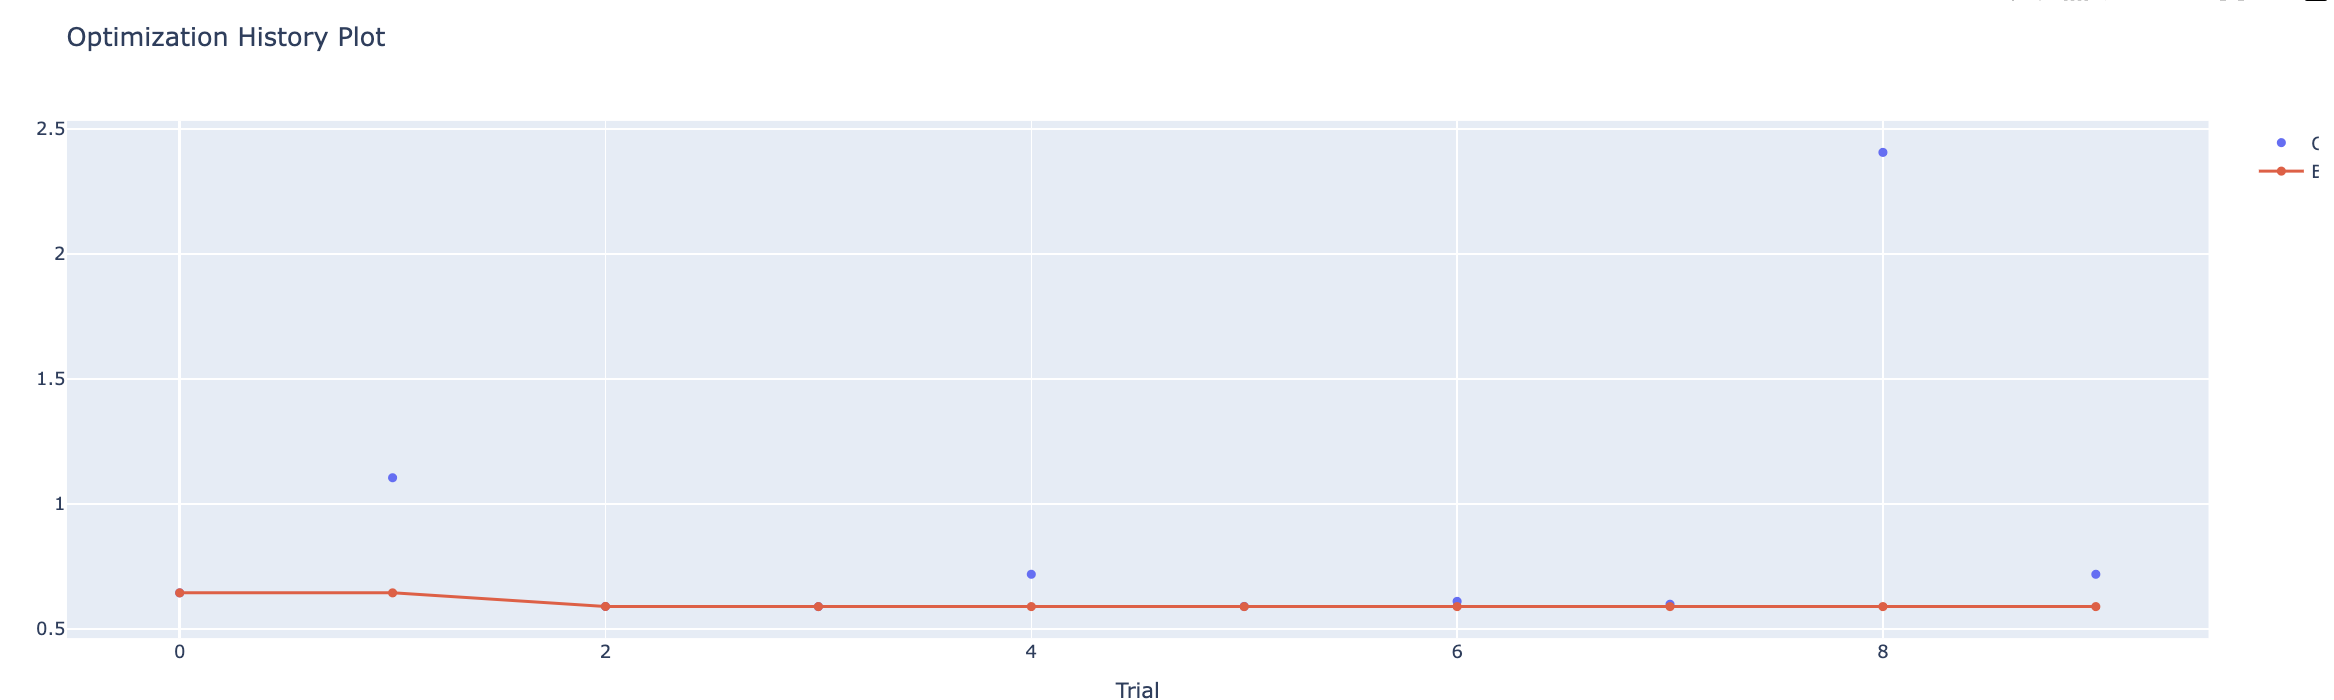

In [58]:
# 하이퍼파라미터 중요도
visualization.plot_param_importances(study)

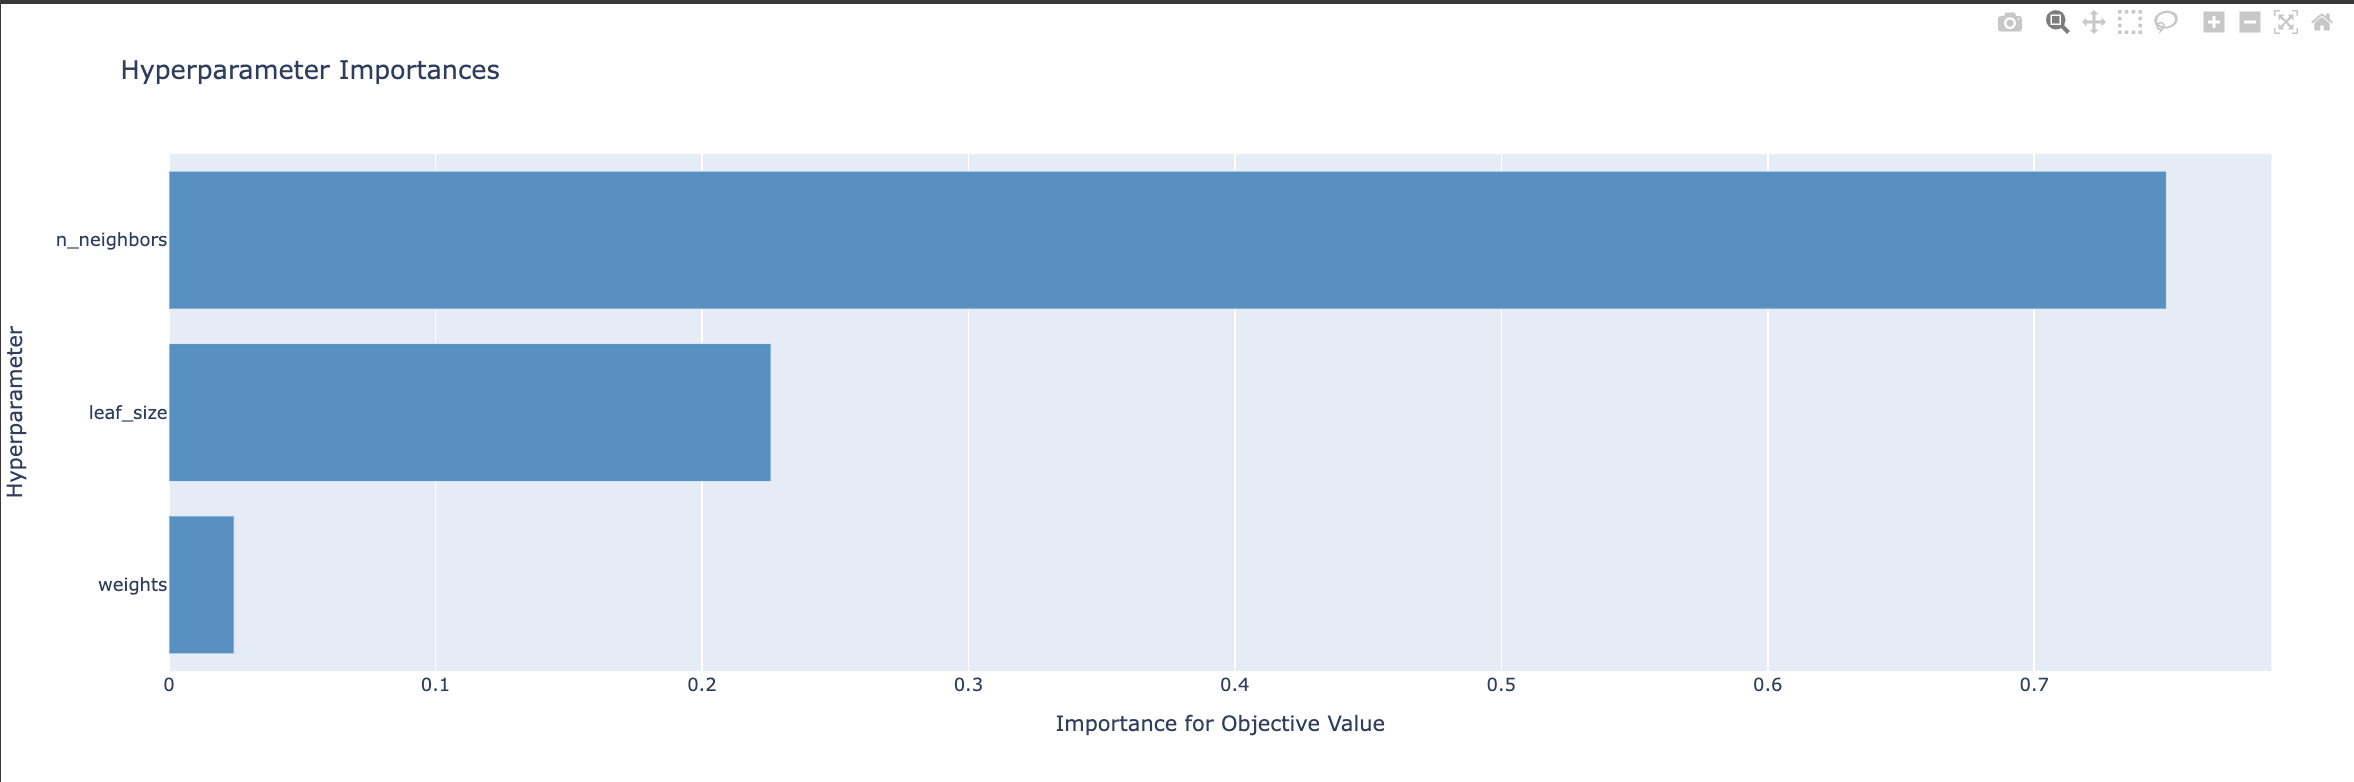

In [59]:
knn_opt = KNeighborsClassifier(n_neighbors= 34, leaf_size=26, weights="distance")
knn_opt_model = knn_opt.fit(X_train, y_train)
y_pred = knn_opt_model.predict(X_val)
y_proba = knn_opt_model.predict_proba(X_val)

In [60]:
print("Optimized KNN Logloss Score : {}".format(log_loss(y_val, y_proba)))
print("Optimized KNN Accuracy Score : {}".format(accuracy_score(y_val, y_pred)))
print("Optimized KNN F1 Score : {} : {}".format(f1_score(y_val, y_pred, average = None),f1_score(y_val, y_pred, average = "macro")))

Optimized KNN Logloss Score : 0.5897105177987253
Optimized KNN Accuracy Score : 0.772833013047436
Optimized KNN F1 Score : [0.89399505 0.60337553 0.55478395 0.66501241] : 0.6792917326726223


              precision    recall  f1-score   support

           0       0.90      0.89      0.89      5883
           1       0.60      0.61      0.60      2126
           2       0.54      0.57      0.55      1267
           3       0.67      0.66      0.67       611

    accuracy                           0.77      9887
   macro avg       0.68      0.68      0.68      9887
weighted avg       0.78      0.77      0.77      9887



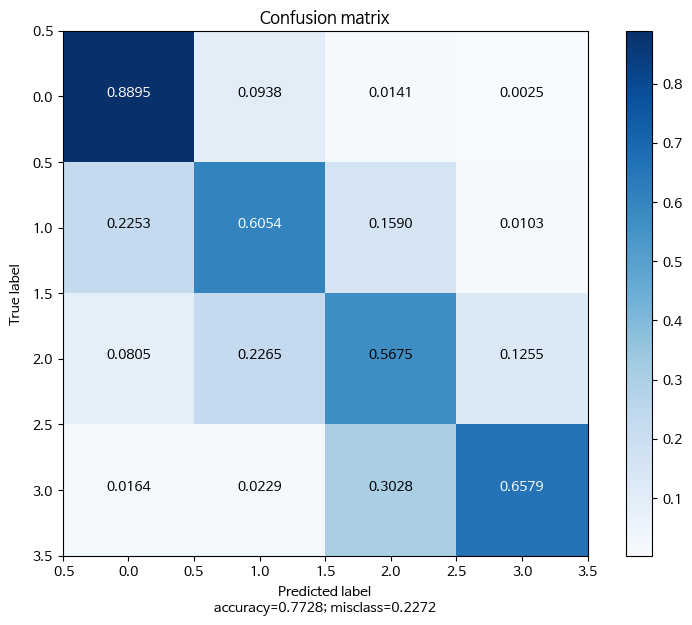

In [61]:
show_cm(y_val, y_pred)

## Gradient Boosting Machines (GBM) Model

In [62]:
# 기본 베이스 라인 GBM
gbm_base = GradientBoostingClassifier()
gbm_base.fit(X_train, y_train)
y_pred = gbm_base.predict(X_val)
y_proba = gbm_base.predict_proba(X_val)

In [63]:
# 기본 베이스 라인 GBM 결과
print("Default GBM Logloss Score : {}".format(log_loss(y_val, y_proba)))
print("Default GBM Accuracy Score : {}".format(accuracy_score(y_val, y_pred)))
print("Default GBM F1 Score : {} : {}".format(f1_score(y_val, y_pred, average = None),f1_score(y_val, y_pred, average = "macro")))
print(classification_report(y_val, y_pred))

Default GBM Logloss Score : 0.3881930634002836
Default GBM Accuracy Score : 0.8656822089612622
Default GBM F1 Score : [0.94312358 0.76836687 0.69607843 0.78677111] : 0.7985849971037091
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5883
           1       0.76      0.77      0.77      2126
           2       0.72      0.67      0.70      1267
           3       0.84      0.74      0.79       611

    accuracy                           0.87      9887
   macro avg       0.81      0.78      0.80      9887
weighted avg       0.86      0.87      0.86      9887



              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5883
           1       0.76      0.77      0.77      2126
           2       0.72      0.67      0.70      1267
           3       0.84      0.74      0.79       611

    accuracy                           0.87      9887
   macro avg       0.81      0.78      0.80      9887
weighted avg       0.86      0.87      0.86      9887



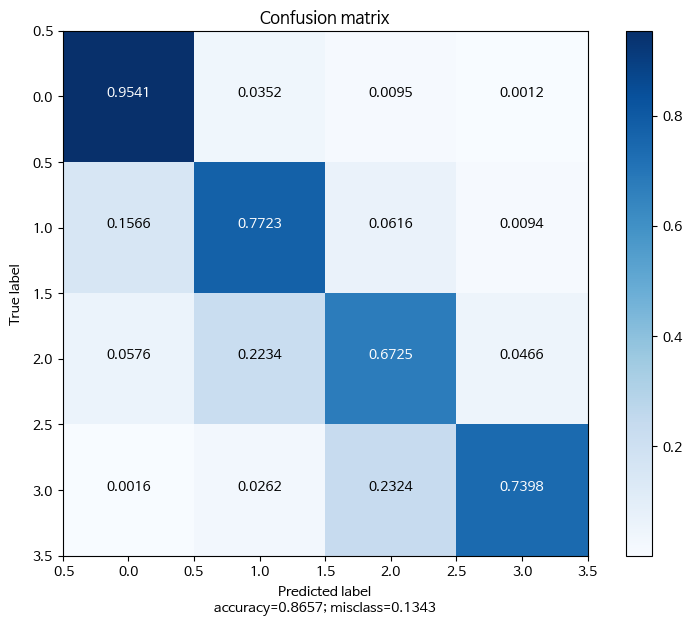

In [64]:
show_cm(y_val, y_pred)

In [65]:
def objective(trial: Trial) -> float:
  params_gbm = {
      "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.5),
      "n_estimators": trial.suggest_int("n_estimators", 80, 200),
      "max_depth": trial.suggest_int("max_depth", 2, 4),
      "min_samples_split": trial.suggest_int("min_samples_split", 2, 4),
  }

  gbm_test = GradientBoostingClassifier(**params_gbm)
  gbm_test_model = gbm_test.fit(
        X_train,
        y_train,
  )
  gbm_test_pred = gbm_test_model.predict_proba(X_val)
  log_score = log_loss(y_val, gbm_test_pred)
  return log_score


In [66]:
sampler = TPESampler(seed=42)
study = create_study(
    study_name="gbm_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)

[I 2023-04-21 21:49:42,265] A new study created in memory with name: gbm_parameter_opt
[I 2023-04-21 21:50:59,752] Trial 0 finished with value: 0.19749259982389483 and parameters: {'learning_rate': 0.19039735882944445, 'n_estimators': 195, 'max_depth': 4, 'min_samples_split': 3}. Best is trial 0 with value: 0.19749259982389483.
[I 2023-04-21 21:51:22,044] Trial 1 finished with value: 0.5545446433383786 and parameters: {'learning_rate': 0.08222922701900608, 'n_estimators': 98, 'max_depth': 2, 'min_samples_split': 4}. Best is trial 0 with value: 0.19749259982389483.
[I 2023-04-21 21:51:57,723] Trial 2 finished with value: 0.3291436993117126 and parameters: {'learning_rate': 0.30255193081288834, 'n_estimators': 165, 'max_depth': 2, 'min_samples_split': 4}. Best is trial 0 with value: 0.19749259982389483.
[I 2023-04-21 21:52:21,439] Trial 3 finished with value: 0.3401715817211716 and parameters: {'learning_rate': 0.41705910719620876, 'n_estimators': 105, 'max_depth': 2, 'min_samples_split'

In [67]:
print("Best Logloss Score:", study.best_value)
print("Best trial:", study.best_trial.params)

Best Logloss Score: 0.19749259982389483
Best trial: {'learning_rate': 0.19039735882944445, 'n_estimators': 195, 'max_depth': 4, 'min_samples_split': 3}


In [68]:
# 시각화
visualization.plot_optimization_history(study)

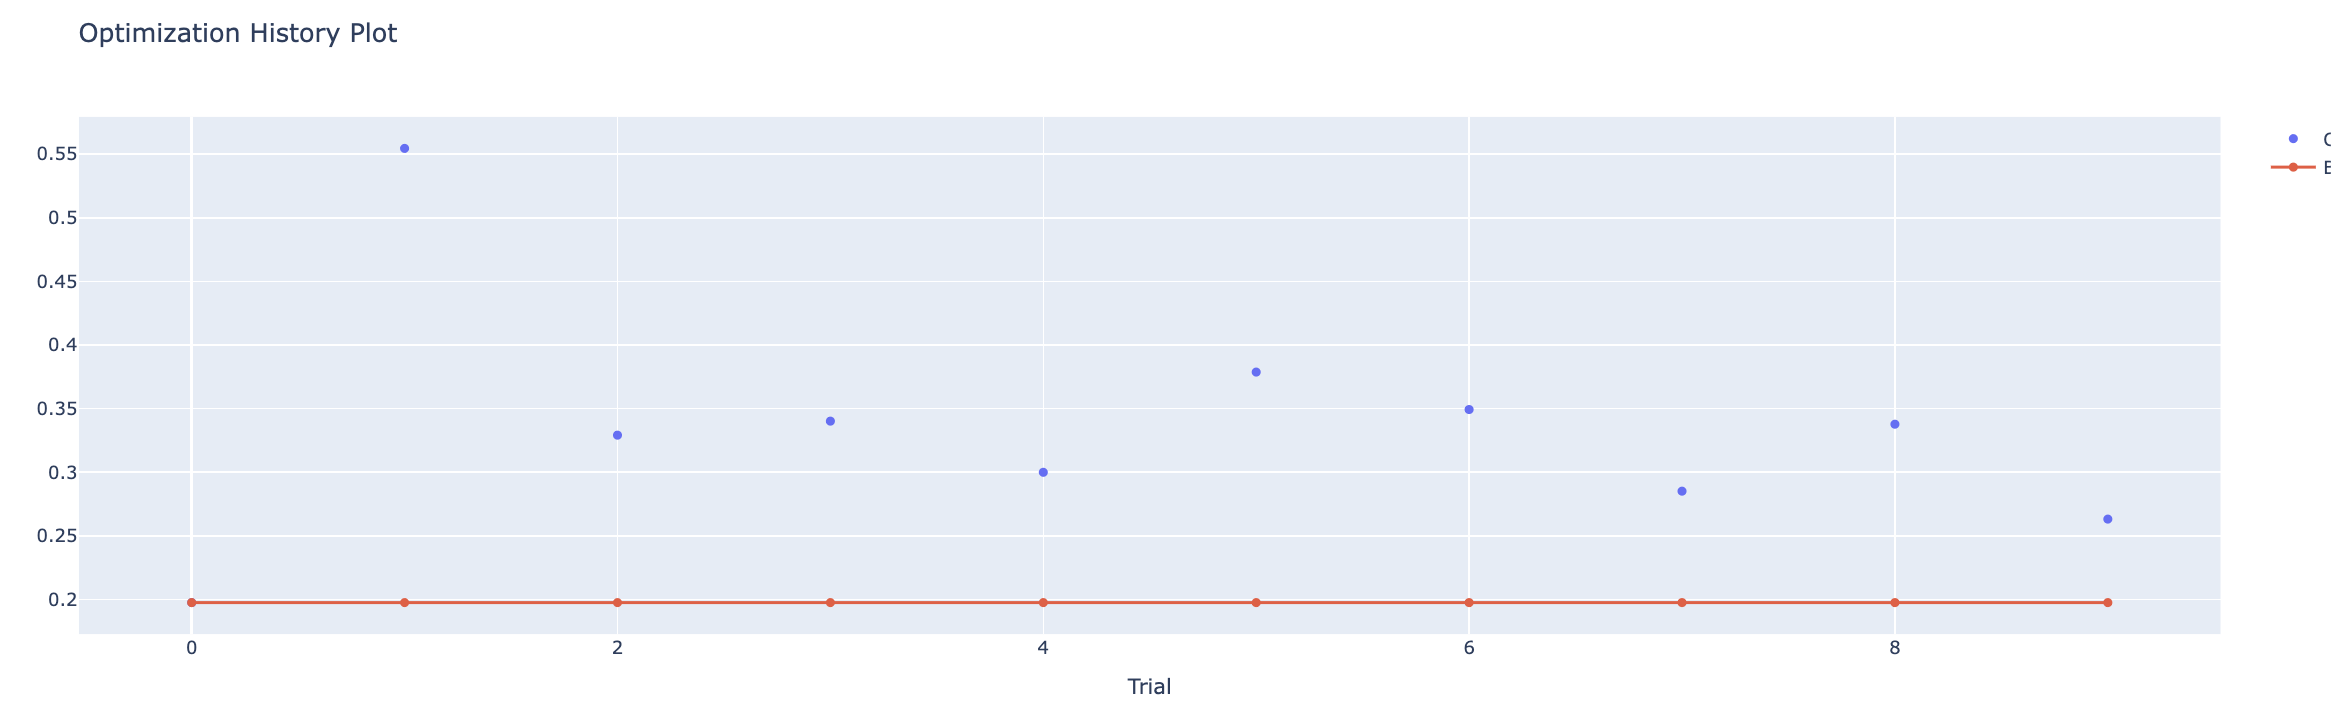

In [69]:
# 하이퍼파라미터 중요도
visualization.plot_param_importances(study)

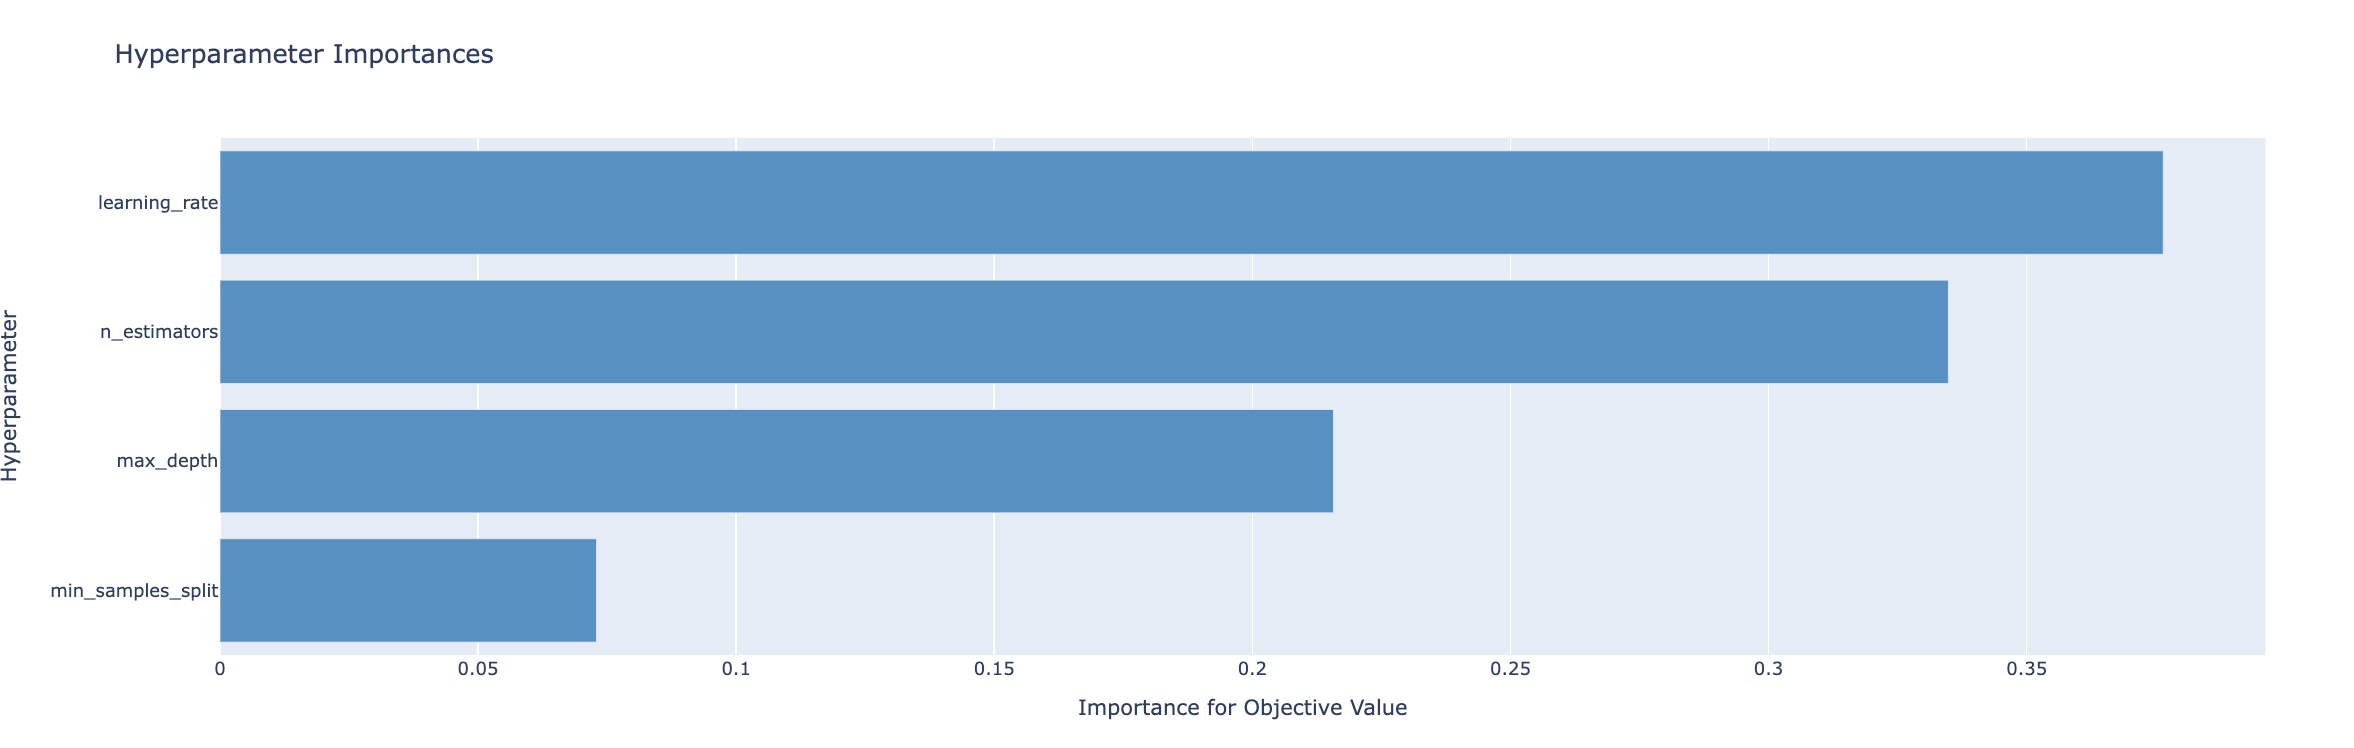

In [70]:
gbm_opt = GradientBoostingClassifier(learning_rate =  0.19039735882944445,
                                 max_depth = 4,
                                 n_estimators = 195,
                                 min_samples_split = 3)
gbm_opt_model = gbm_opt.fit(X_train, y_train)
y_pred = gbm_opt_model.predict(X_val)
y_proba = gbm_opt_model.predict_proba(X_val)

In [71]:
print("Optimized GBM Logloss Score : {}".format(log_loss(y_val, y_proba)))
print("Optimized GBM Accuracy Score : {}".format(accuracy_score(y_val, y_pred)))
print("Optimized GBM F1 Score : {} : {}".format(f1_score(y_val, y_pred, average = None),f1_score(y_val, y_pred, average = "macro")))

Optimized GBM Logloss Score : 0.1974489322124031
Optimized GBM Accuracy Score : 0.9312228178416102
Optimized GBM F1 Score : [0.96976426 0.88612933 0.84885968 0.89347647] : 0.8995574367738906


              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5883
           1       0.88      0.89      0.89      2126
           2       0.83      0.87      0.85      1267
           3       0.90      0.89      0.89       611

    accuracy                           0.93      9887
   macro avg       0.90      0.90      0.90      9887
weighted avg       0.93      0.93      0.93      9887



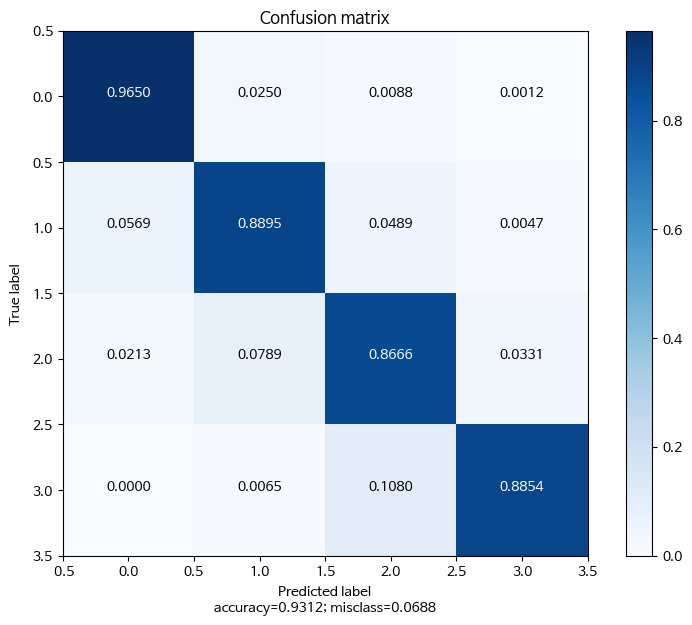

In [72]:
show_cm(y_val, y_pred)

## Light GBM Model

In [73]:
# 기본 베이스 라인 Light GBM
lgbm_base = LGBMClassifier()
lgbm_base_model=lgbm_base.fit(X_train, y_train)
y_pred = lgbm_base_model.predict(X_val)
y_proba = lgbm_base_model.predict_proba(X_val)

In [74]:
# 기본 베이스 라인 Light GBM 결과
print("Default LGBM Logloss Score : {}".format(log_loss(y_val, y_proba)))
print("Optimized LGBM Accuracy Score : {}".format(accuracy_score(y_val, y_pred)))
print("Default LGBM F1 Score : {}: {}".format(f1_score(y_val, y_pred, average = None),f1_score(y_val, y_pred, average = "macro")))

Default LGBM Logloss Score : 0.16456269271332022
Optimized LGBM Accuracy Score : 0.9446748255284717
Default LGBM F1 Score : [0.97315379 0.90985325 0.88544892 0.92084006]: 0.9223240043197702


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      5883
           1       0.90      0.92      0.91      2126
           2       0.87      0.90      0.89      1267
           3       0.91      0.93      0.92       611

    accuracy                           0.94      9887
   macro avg       0.92      0.93      0.92      9887
weighted avg       0.95      0.94      0.95      9887



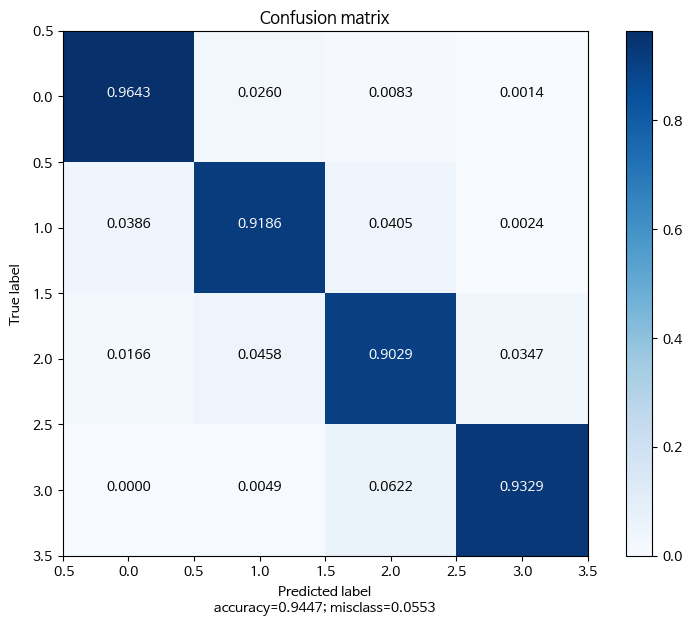

In [75]:
show_cm(y_val, y_pred)

In [76]:
def objective(trial: Trial) -> float:
  params_lgbm = {
      "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.5),
      "n_estimators": trial.suggest_int("n_estimators", 80, 200),
      "max_depth": trial.suggest_int("max_depth", -1, 4),
      "min_child_samples": trial.suggest_int("min_child_samples", 15, 30),
  }



  lgbm_test = LGBMClassifier(**params_lgbm)
  lgbm_test_model = lgbm_test.fit(
        X_train,
        y_train,
  )
  lgbm_test_pred = lgbm_test_model.predict_proba(X_val)
  log_score = log_loss(y_val, lgbm_test_pred)
  return log_score


In [77]:
sampler = TPESampler(seed=42)
study = create_study(
    study_name="lgbm_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)

[I 2023-04-21 21:57:48,056] A new study created in memory with name: lgbm_parameter_opt
[I 2023-04-21 21:57:52,202] Trial 0 finished with value: 0.23621793527610457 and parameters: {'learning_rate': 0.19039735882944445, 'n_estimators': 195, 'max_depth': 3, 'min_child_samples': 24}. Best is trial 0 with value: 0.23621793527610457.
[I 2023-04-21 21:57:54,964] Trial 1 finished with value: 0.17484715327138303 and parameters: {'learning_rate': 0.08222922701900608, 'n_estimators': 98, 'max_depth': -1, 'min_child_samples': 28}. Best is trial 1 with value: 0.17484715327138303.
[I 2023-04-21 21:57:57,646] Trial 2 finished with value: 0.14678900891604688 and parameters: {'learning_rate': 0.30255193081288834, 'n_estimators': 165, 'max_depth': -1, 'min_child_samples': 30}. Best is trial 2 with value: 0.14678900891604688.
[I 2023-04-21 21:57:59,344] Trial 3 finished with value: 2.324142011983424 and parameters: {'learning_rate': 0.41705910719620876, 'n_estimators': 105, 'max_depth': 0, 'min_child_s

In [78]:
print("Best Logloss Score:", study.best_value)
print("Best trial:", study.best_trial.params)

Best Logloss Score: 0.14249717066269613
Best trial: {'learning_rate': 0.23075464218743277, 'n_estimators': 175, 'max_depth': 0, 'min_child_samples': 23}


In [79]:
# 시각화
visualization.plot_optimization_history(study)

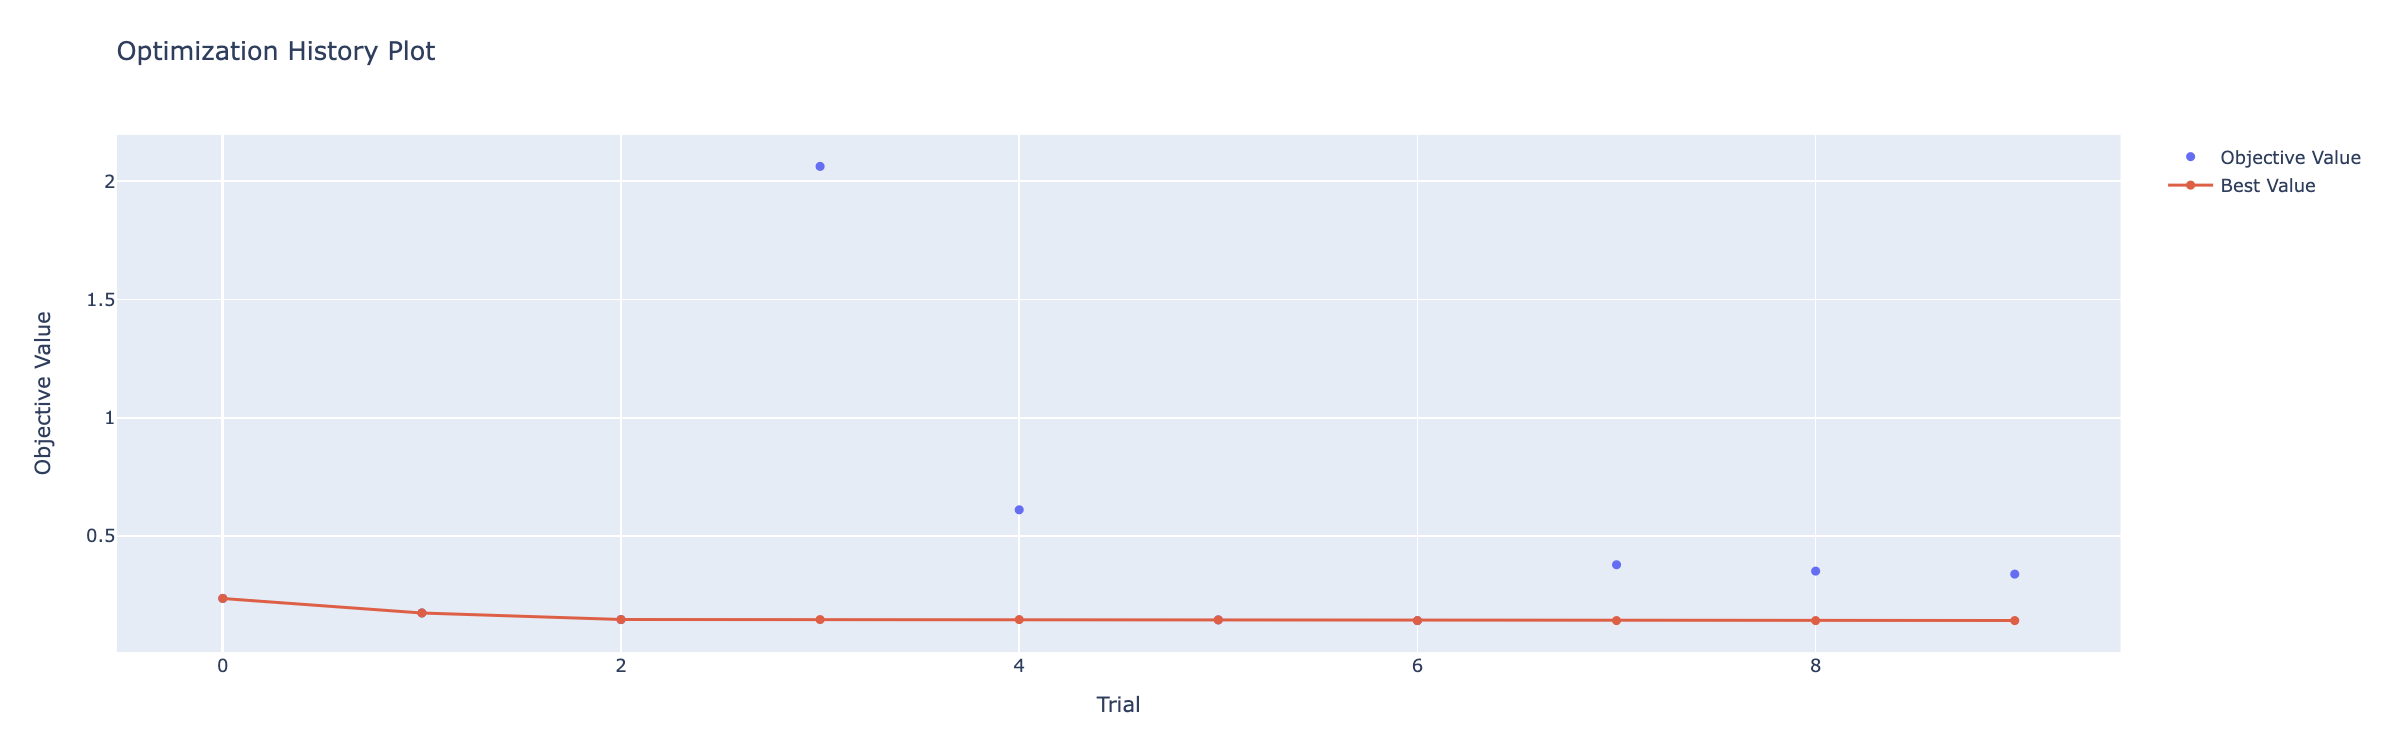

![](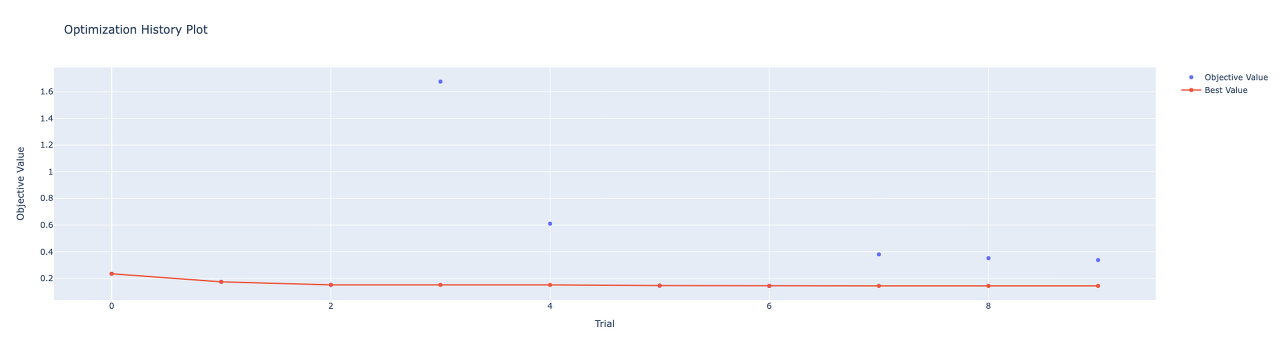)

In [80]:
lgbm_opt = LGBMClassifier(learning_rate= 0.23075464218743277, n_estimators = 175, max_depth = 0, min_child_samples =23)
lgbm_opt_model = lgbm_opt.fit(X_train, y_train)
y_pred = lgbm_opt_model.predict(X_val)
y_proba = lgbm_opt_model.predict_proba(X_val)

In [81]:
print("Optimized LGBM Logloss Score : {}".format(log_loss(y_val, y_proba)))
print("Optimized LGBM Accuracy Score : {}".format(accuracy_score(y_val, y_pred)))
print("Optimized LGBM F1 Score : {} : {}".format(f1_score(y_val, y_pred, average = None),f1_score(y_val, y_pred, average = "macro")))

Optimized LGBM Logloss Score : 0.14249717066269613
Optimized LGBM Accuracy Score : 0.9479113988065136
Optimized LGBM F1 Score : [0.97524625 0.91979362 0.88684311 0.91530945] : 0.92429810865877


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5883
           1       0.92      0.92      0.92      2126
           2       0.86      0.91      0.89      1267
           3       0.91      0.92      0.92       611

    accuracy                           0.95      9887
   macro avg       0.92      0.93      0.92      9887
weighted avg       0.95      0.95      0.95      9887



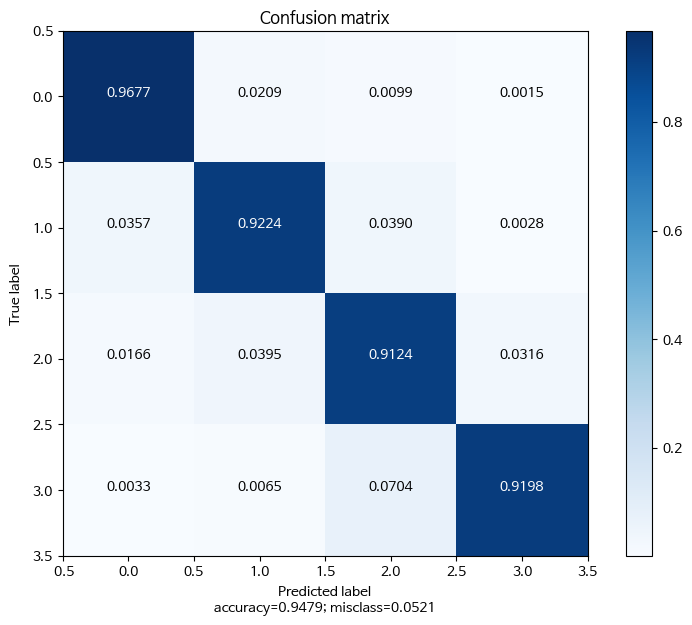

In [82]:
show_cm(y_val, y_pred)

# Test Model

In [83]:
knn_y_pred = knn_opt_model.predict(X_test)
knn_y_proba = knn_opt_model.predict_proba(X_test)

In [84]:
print("Optimized KNN Logloss Score : {}".format(log_loss(y_test, knn_y_proba)))
print("Optimized KNN Accuracy Score : {}".format(accuracy_score(y_test, knn_y_pred)))
print("Optimized KNN F1 Score : {}: {}".format(f1_score(y_test, knn_y_pred, average = None),f1_score(y_test, knn_y_pred, average = "macro")))

Optimized KNN Logloss Score : 0.5842289462826353
Optimized KNN Accuracy Score : 0.7714170122382927
Optimized KNN F1 Score : [0.89720757 0.59895833 0.55386894 0.66302652]: 0.6782653412733847


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5775
           1       0.60      0.60      0.60      2124
           2       0.55      0.56      0.55      1339
           3       0.67      0.65      0.66       649

    accuracy                           0.77      9887
   macro avg       0.68      0.68      0.68      9887
weighted avg       0.77      0.77      0.77      9887



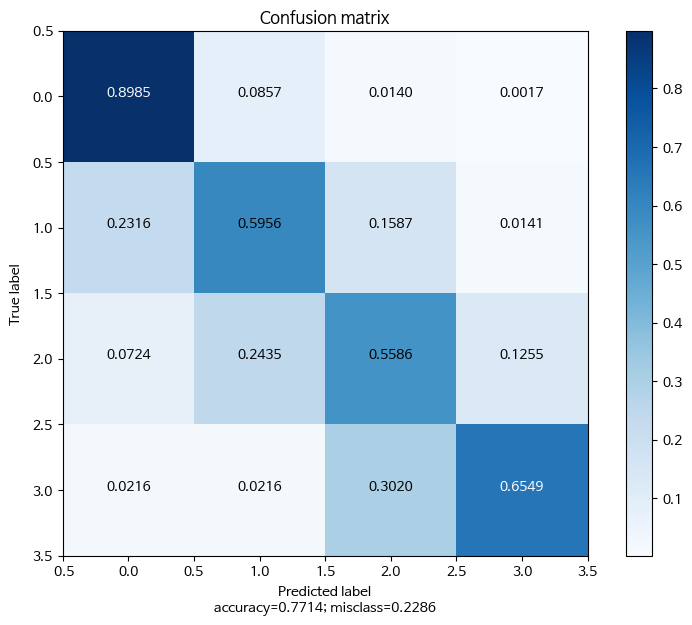

In [85]:
show_cm(y_test, knn_y_pred)

In [86]:
gbm_y_pred = gbm_opt_model.predict(X_test)
gbm_y_proba = gbm_opt_model.predict_proba(X_test)

In [87]:
print("Optimized GBM Logloss Score : {}".format(log_loss(y_test, gbm_y_proba)))
print("Optimized GBM Accuracy Score : {}".format(accuracy_score(y_test, gbm_y_pred)))
print("Optimized GBM F1 Score : {} : {}".format(f1_score(y_test, gbm_y_pred, average = None),f1_score(y_test, gbm_y_pred, average = "macro")))

Optimized GBM Logloss Score : 0.202823256993279
Optimized GBM Accuracy Score : 0.9284919591382623
Optimized GBM F1 Score : [0.96909186 0.8851462  0.84638109 0.88138256] : 0.8955004272482167


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5775
           1       0.88      0.89      0.89      2124
           2       0.84      0.86      0.85      1339
           3       0.90      0.86      0.88       649

    accuracy                           0.93      9887
   macro avg       0.90      0.89      0.90      9887
weighted avg       0.93      0.93      0.93      9887



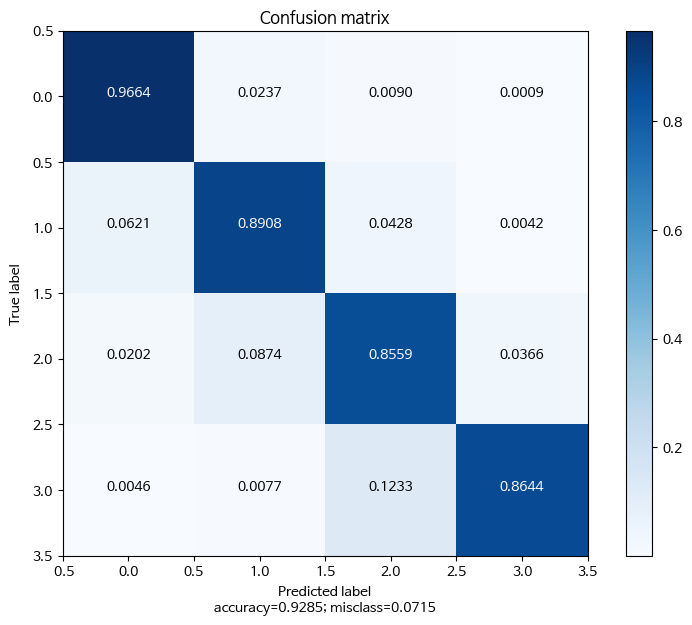

In [88]:
show_cm(y_test, gbm_y_pred)

In [89]:
lgbm_y_pred = lgbm_opt_model.predict(X_test)
lgbm_y_proba = lgbm_opt_model.predict_proba(X_test)

In [90]:
print("Optimized LGBM Logloss Score : {}".format(log_loss(y_test, lgbm_y_proba)))
print("Optimized LGBM Accuracy Score : {}".format(accuracy_score(y_test, lgbm_y_pred)))
print("Optimized LGBM F1 Score : {} : {}".format(f1_score(y_test, lgbm_y_pred, average = None),f1_score(y_test, lgbm_y_pred, average = "macro")))

Optimized LGBM Logloss Score : 0.14381065859935985
Optimized LGBM Accuracy Score : 0.9476079700616972
Optimized LGBM F1 Score : [0.97537632 0.91824783 0.89068826 0.91737452] : 0.9254217314296211


              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5775
           1       0.91      0.92      0.92      2124
           2       0.88      0.90      0.89      1339
           3       0.92      0.92      0.92       649

    accuracy                           0.95      9887
   macro avg       0.92      0.93      0.93      9887
weighted avg       0.95      0.95      0.95      9887



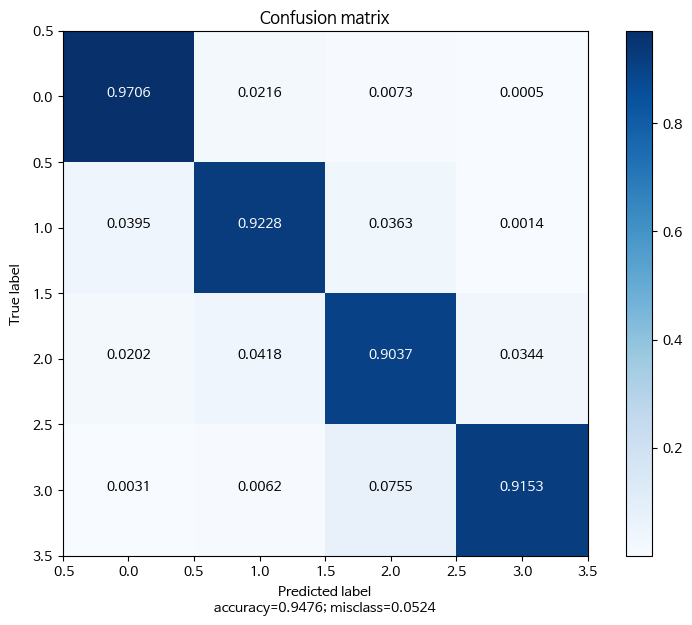

In [91]:
show_cm(y_test, lgbm_y_pred)

# 모델 저장 및 테스트

In [92]:
# 모델 저장
joblib.dump(lgbm_opt_model, './model/grade_clf/clf_LGBM.pkl')

['./model/grade_clf/clf_LGBM.pkl']

In [93]:
# 모델 테스트
import random

def load_model_and_test():
  # 테스트 사용할 데이터 인덱스 뽑기
  idx = random.randrange(0, len(X_test)-1)
  print("테스트 idx : ", idx)
  sample = X_test.iloc[idx,:]

  # 모델 불러오기 및 예측
  # 저장한 모델을 불러와 변수에 담습니다.
  loaded_model = joblib.load('./model/grade_clf/clf_LGBM.pkl')
  input = sample.values
  prediction = loaded_model.predict([input])

    # 예측 결과 출력
  print("예측값 : ",prediction[0], ", 참값 : ",y_test.iloc[idx])

In [94]:
for i in range(10):
  load_model_and_test()

테스트 idx :  5377
예측값 :  0 , 참값 :  0
테스트 idx :  1368
예측값 :  0 , 참값 :  0
테스트 idx :  5741
예측값 :  0 , 참값 :  0
테스트 idx :  4124
예측값 :  0 , 참값 :  0
테스트 idx :  3604
예측값 :  0 , 참값 :  0
테스트 idx :  8693
예측값 :  1 , 참값 :  1
테스트 idx :  3818
예측값 :  0 , 참값 :  0
테스트 idx :  2813
예측값 :  0 , 참값 :  0
테스트 idx :  3032
예측값 :  0 , 참값 :  0
테스트 idx :  80
예측값 :  0 , 참값 :  0
